In [4]:
# import and load file csv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

df_terror = pd.read_csv('./Dataset - Terror Web Links/DOMESTICTERRORWEB.csv')

In [5]:
# graph initialization in networkX
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

In [6]:
# calculation of the structure of nodes and edges

# choice of layout and calculation of positions
pos = nx.kamada_kawai_layout(G_directed)

# position adjustment (for better visualization)
pos['southerncaucus.org'] = (pos['southerncaucus.org'][0] + 0.1, pos['southerncaucus.org'][1])
pos['crownrights.com'] = (pos['crownrights.com'][0] - 0.05, pos['crownrights.com'][1] - 0.3)
pos['southernsentinel.tripod.com'] = (pos['southernsentinel.tripod.com'][0]-0.13, pos['southernsentinel.tripod.com'][1])
pos['resist.com'] = (pos['resist.com'][0] - 0.05, pos['resist.com'][1]+0.05)

pos['resist.com'] = (pos['resist.com'][0] - 0.05, pos['resist.com'][1]+0.05)
pos['nationalist.org'] = (pos['nationalist.org'][0] - 0.05, pos['nationalist.org'][1]-0.025)
pos['anti-semitism.net'] = (pos['anti-semitism.net'][0]-0.035, pos['anti-semitism.net'][1]-0.06)
pos['14words.com'] = (pos['14words.com'][0]+0.05, pos['14words.com'][1]-0.05)


# setting edges size
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

#### Network visualization



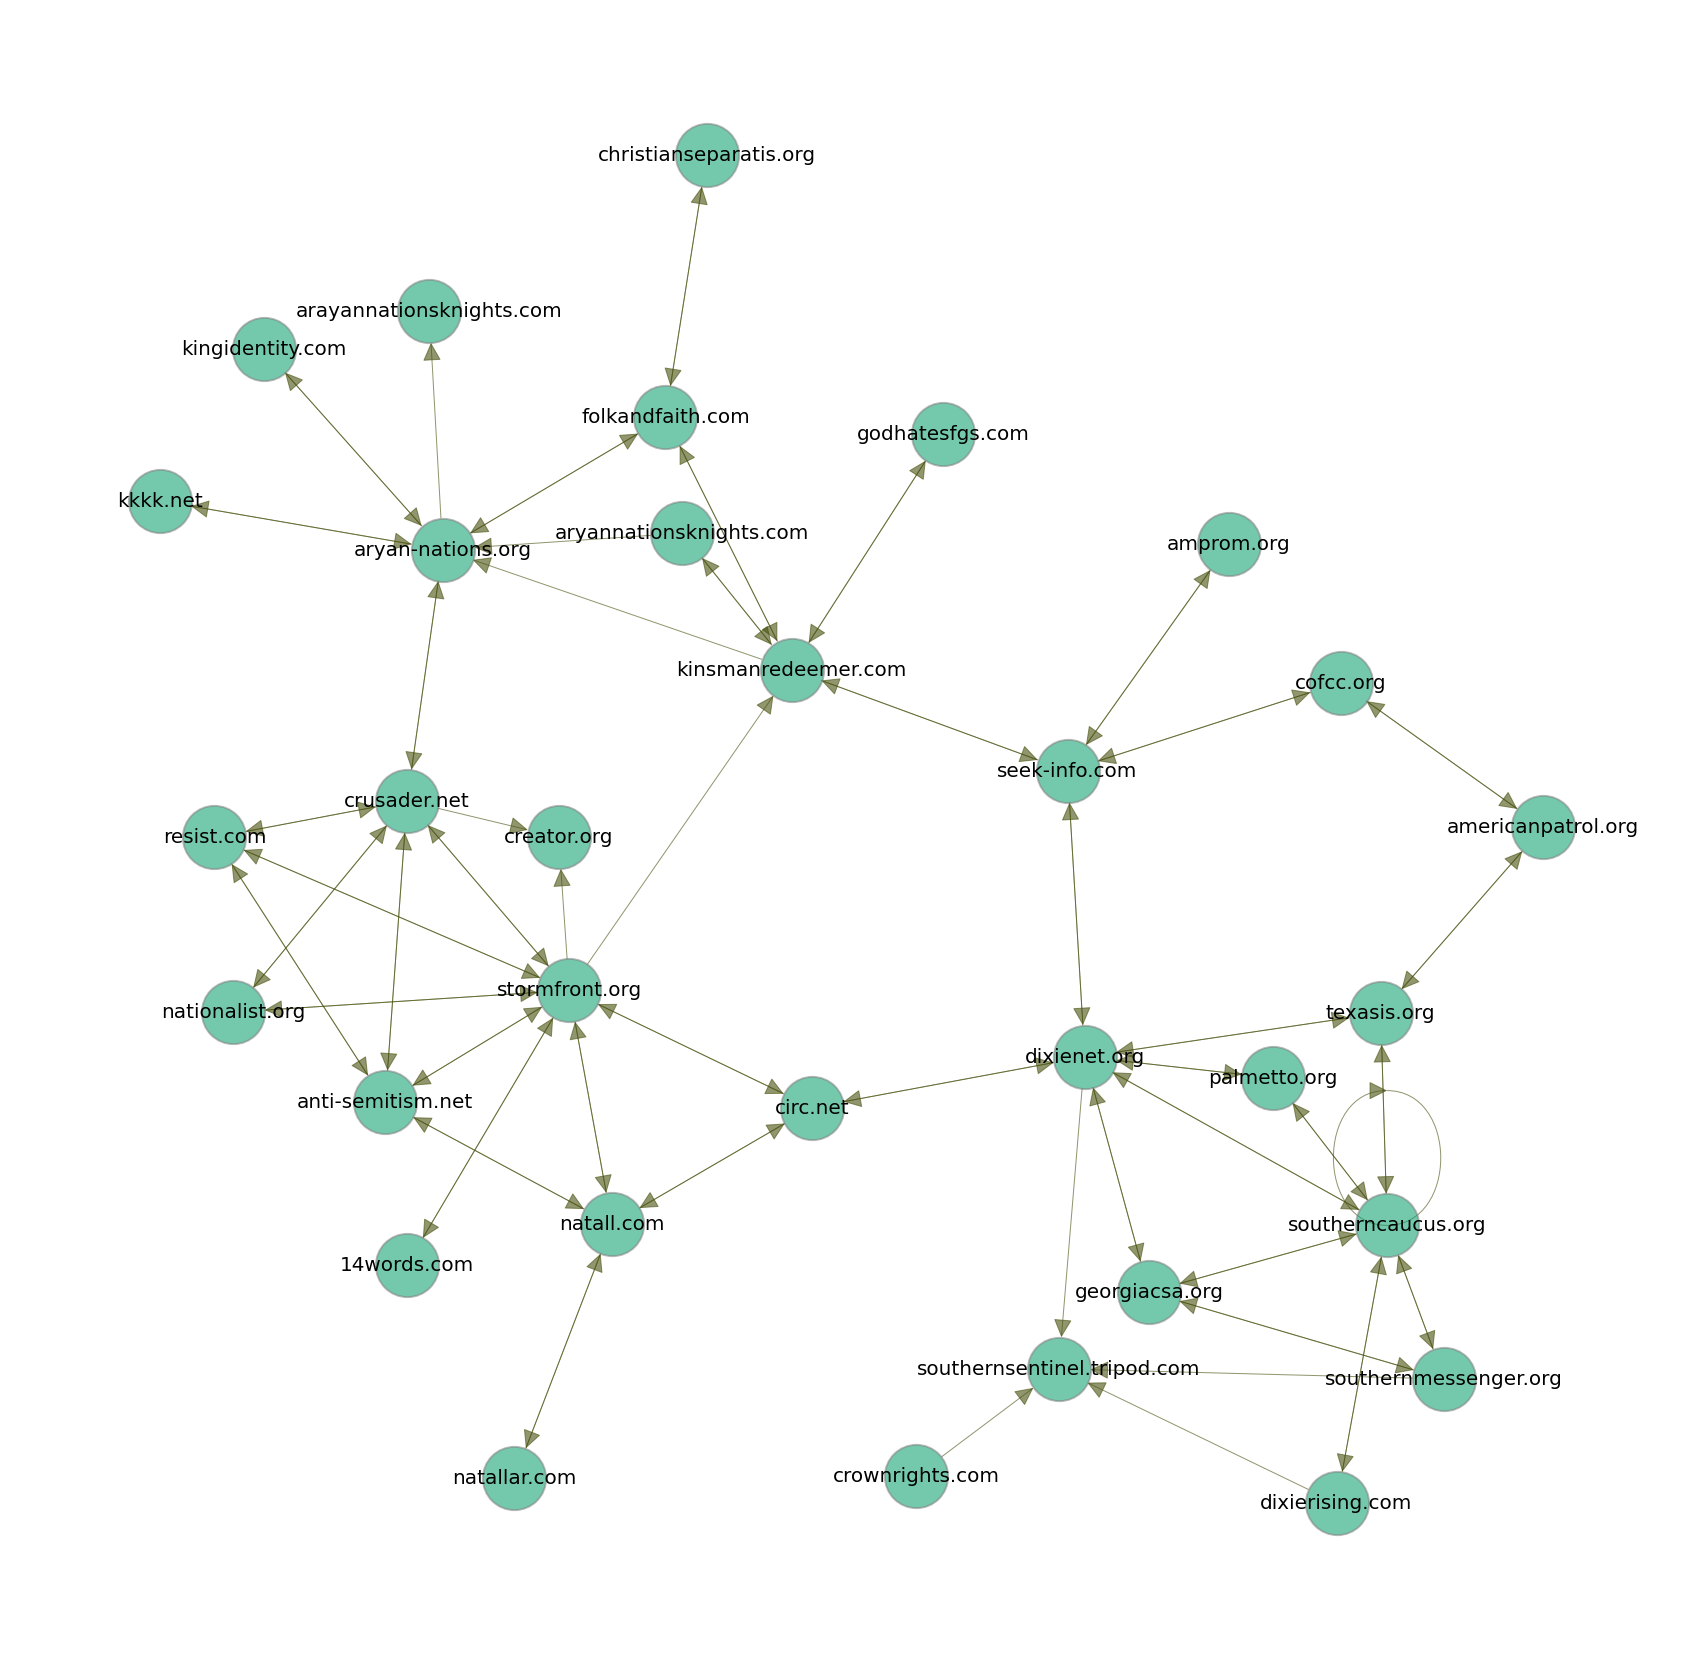

In [12]:
# Draw graph
node_size = 1000
plt.figure(figsize=(15, 15))
nodes = nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='#029e6b', alpha=0.55)
nodes.set_edgecolor("grey")
nx.draw_networkx_edges(G_directed, pos, width=edge_width,node_size=node_size,alpha=0.6, arrows=True, arrowsize=20, edge_color=(0.28235,0.317647, 0.05490) )
nx.draw_networkx_labels(G_directed, pos, font_size=10, font_color='black')
plt.axis('off') 
plt.show()

#### In\-degree centrality



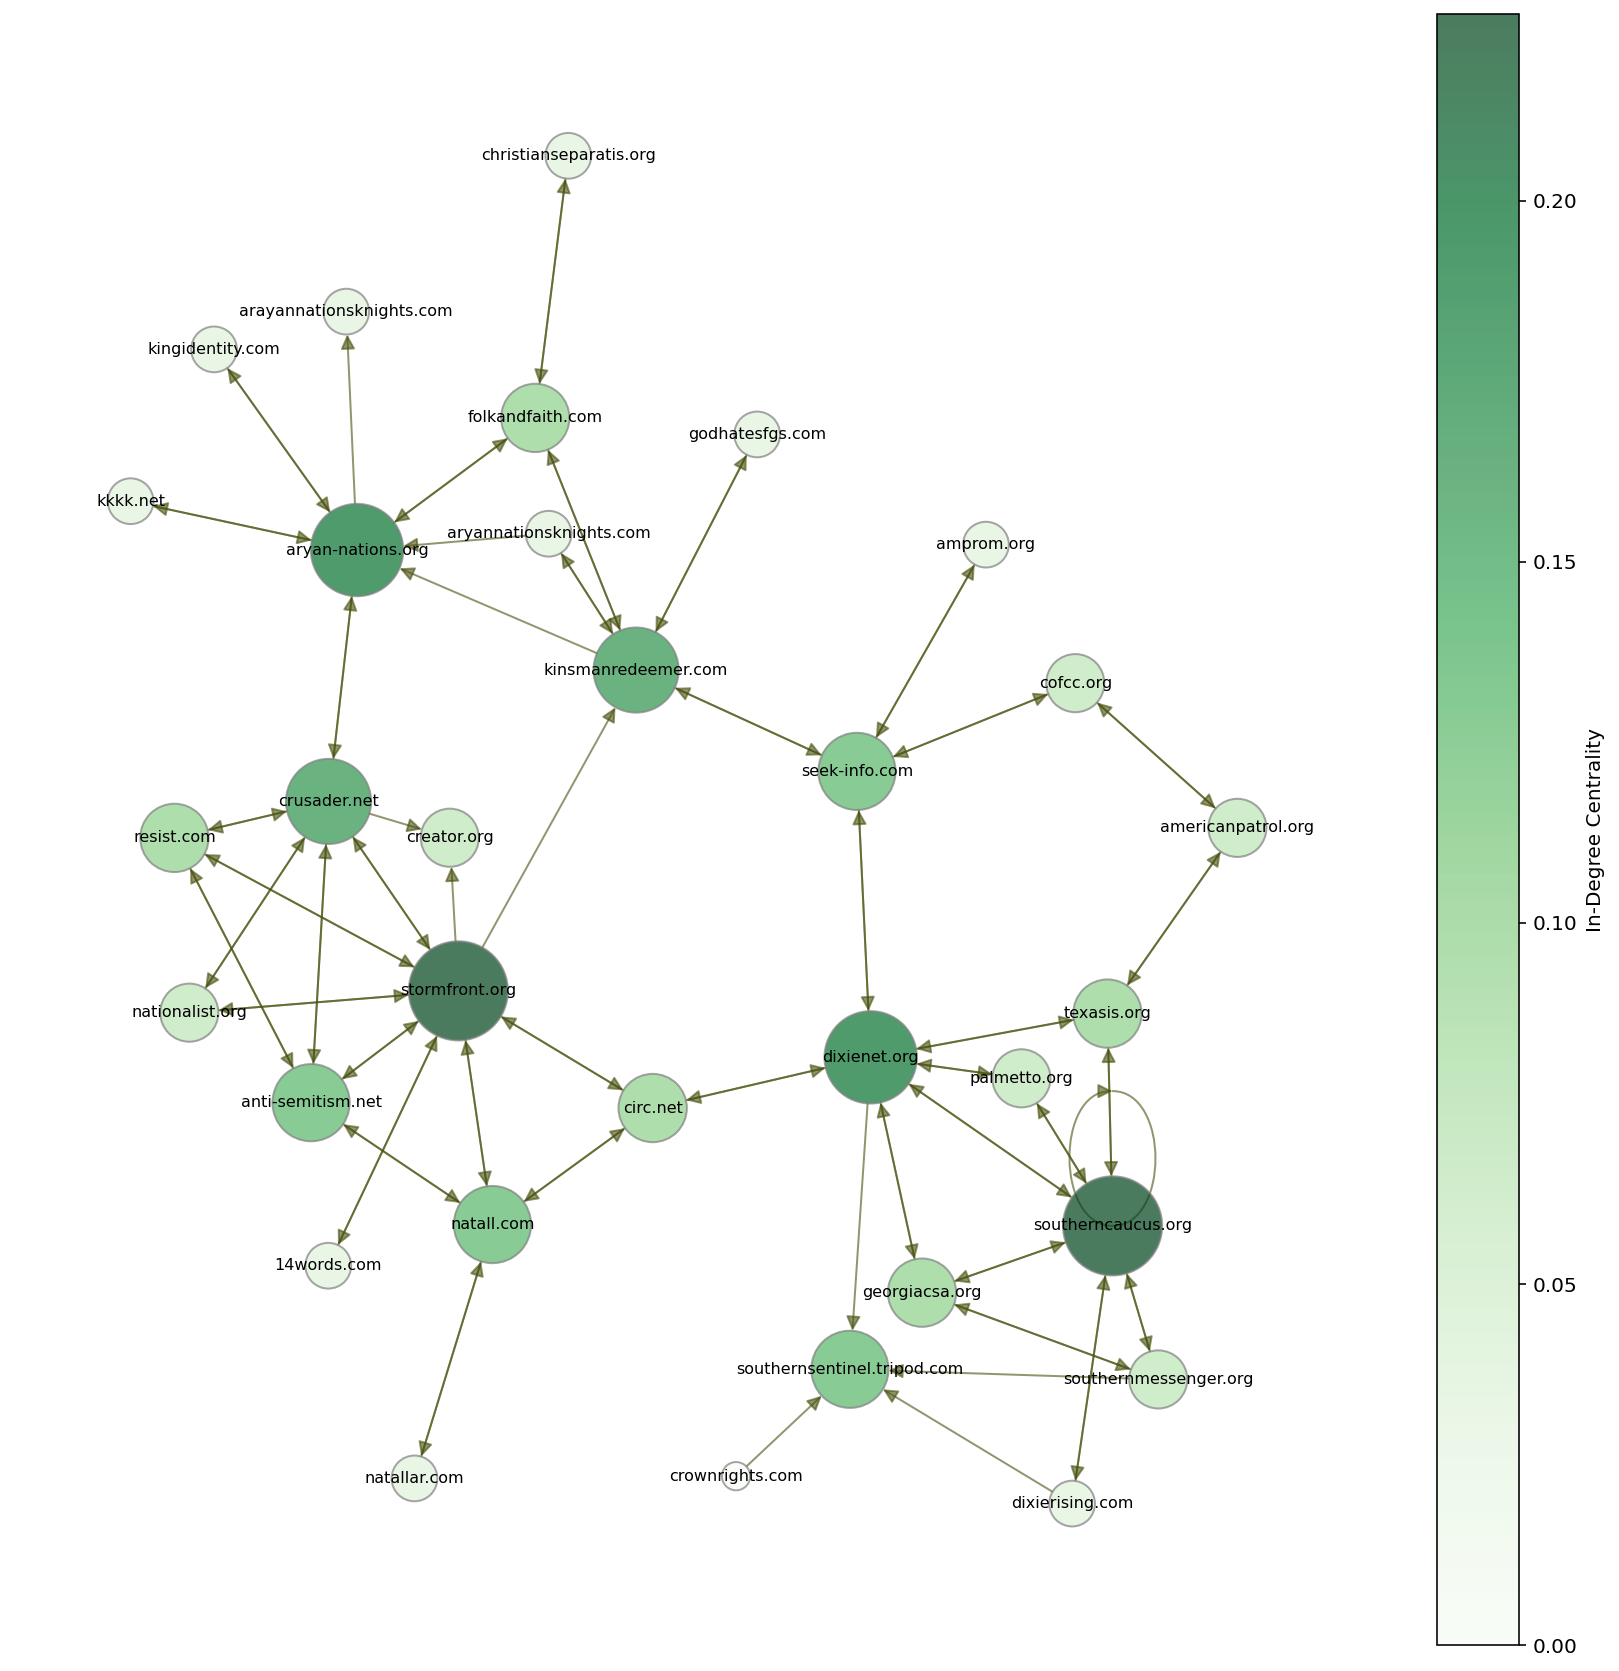

In [13]:
# In-Degree Graph

# calculate the size of each node based on in-degree centrality
in_degree_centrality = nx.in_degree_centrality(G_directed)
node_size = [v * 10000 + 200 for v in in_degree_centrality.values()]

# Color map based on in-degree centrality
colors = [in_degree_centrality.get(node, 0) for node in G_directed.nodes()]

# draw graph
plt.figure(figsize=(15, 15))
nodes = nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color=colors, cmap=plt.cm.Greens, alpha=0.7)
nodes.set_edgecolor("grey")
edges = nx.draw_networkx_edges(G_directed, pos,node_size=node_size, arrows = True, edge_color=(0.28235,0.317647, 0.05490), arrowsize=15, alpha=0.6)

nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')

# add legend
plt.colorbar(nodes, label='In-Degree Centrality')

plt.axis('off')
plt.show()

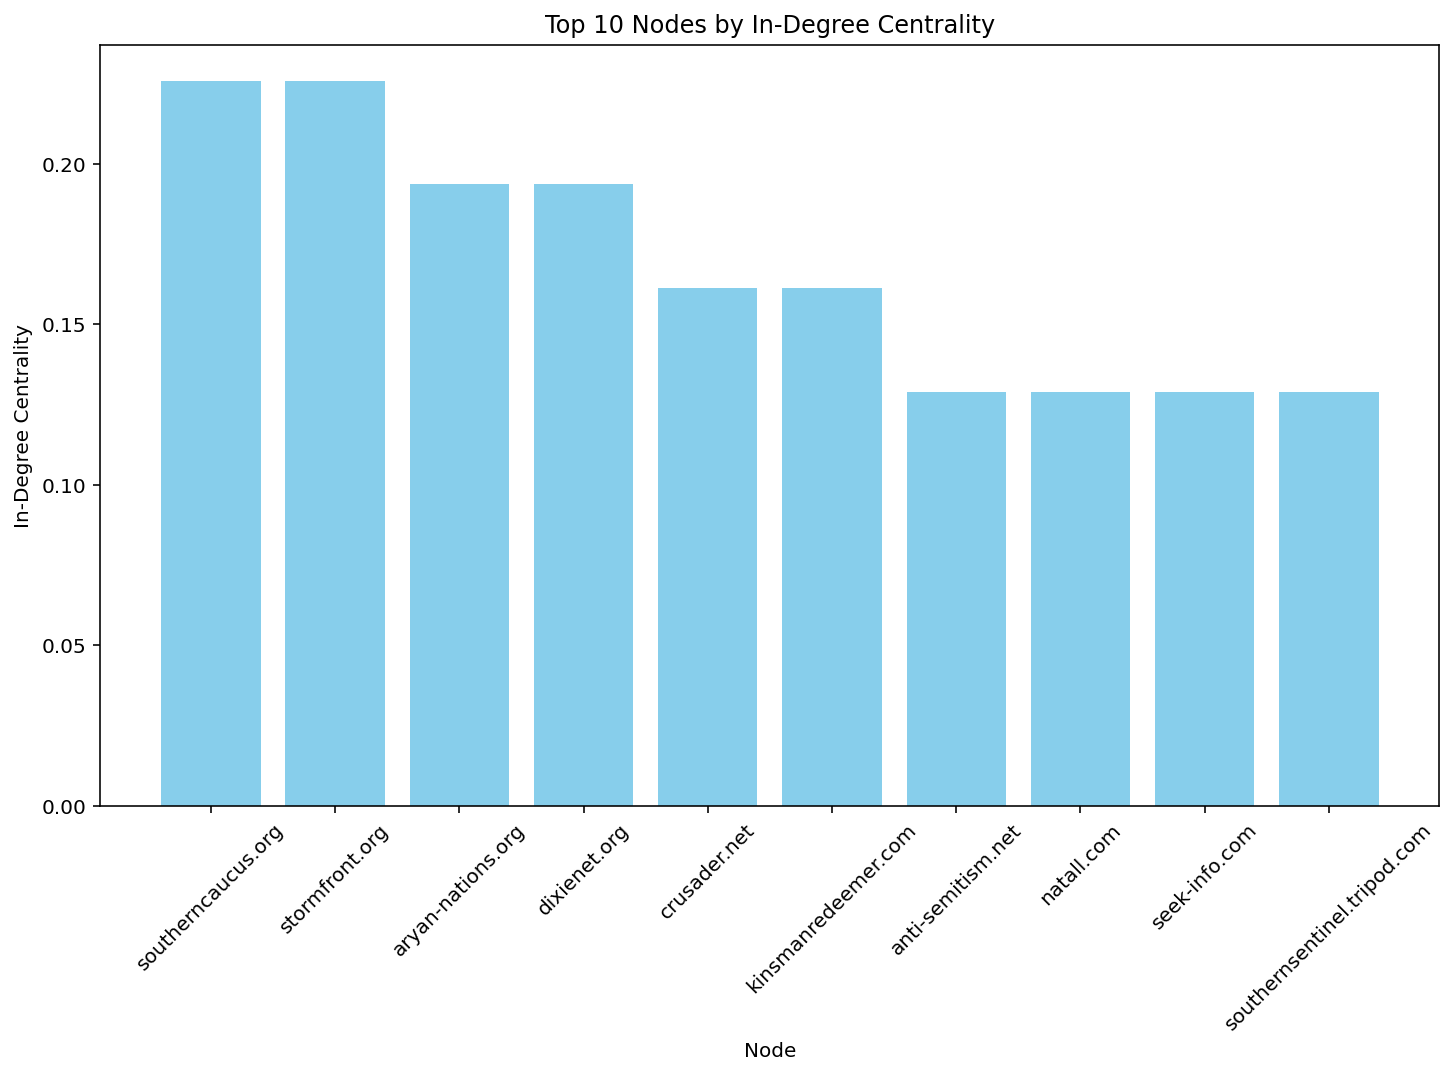

In [21]:
n = 10

# Calculate in-degree centrality
in_degree_centrality = nx.in_degree_centrality(G_directed)
top_n_in_degree_nodes = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

nodes = [node for node, centrality in top_n_in_degree_nodes]
centralities = [centrality for node, centrality in top_n_in_degree_nodes]

# Create insogram
plt.figure(figsize=(12, 7))
plt.bar(nodes, centralities, color='skyblue')
plt.title('Top 10 Nodes by In-Degree Centrality')
plt.xlabel('Node')
plt.ylabel('In-Degree Centrality')
plt.xticks(rotation=45)
plt.show()


#### Out\-degree Centrality



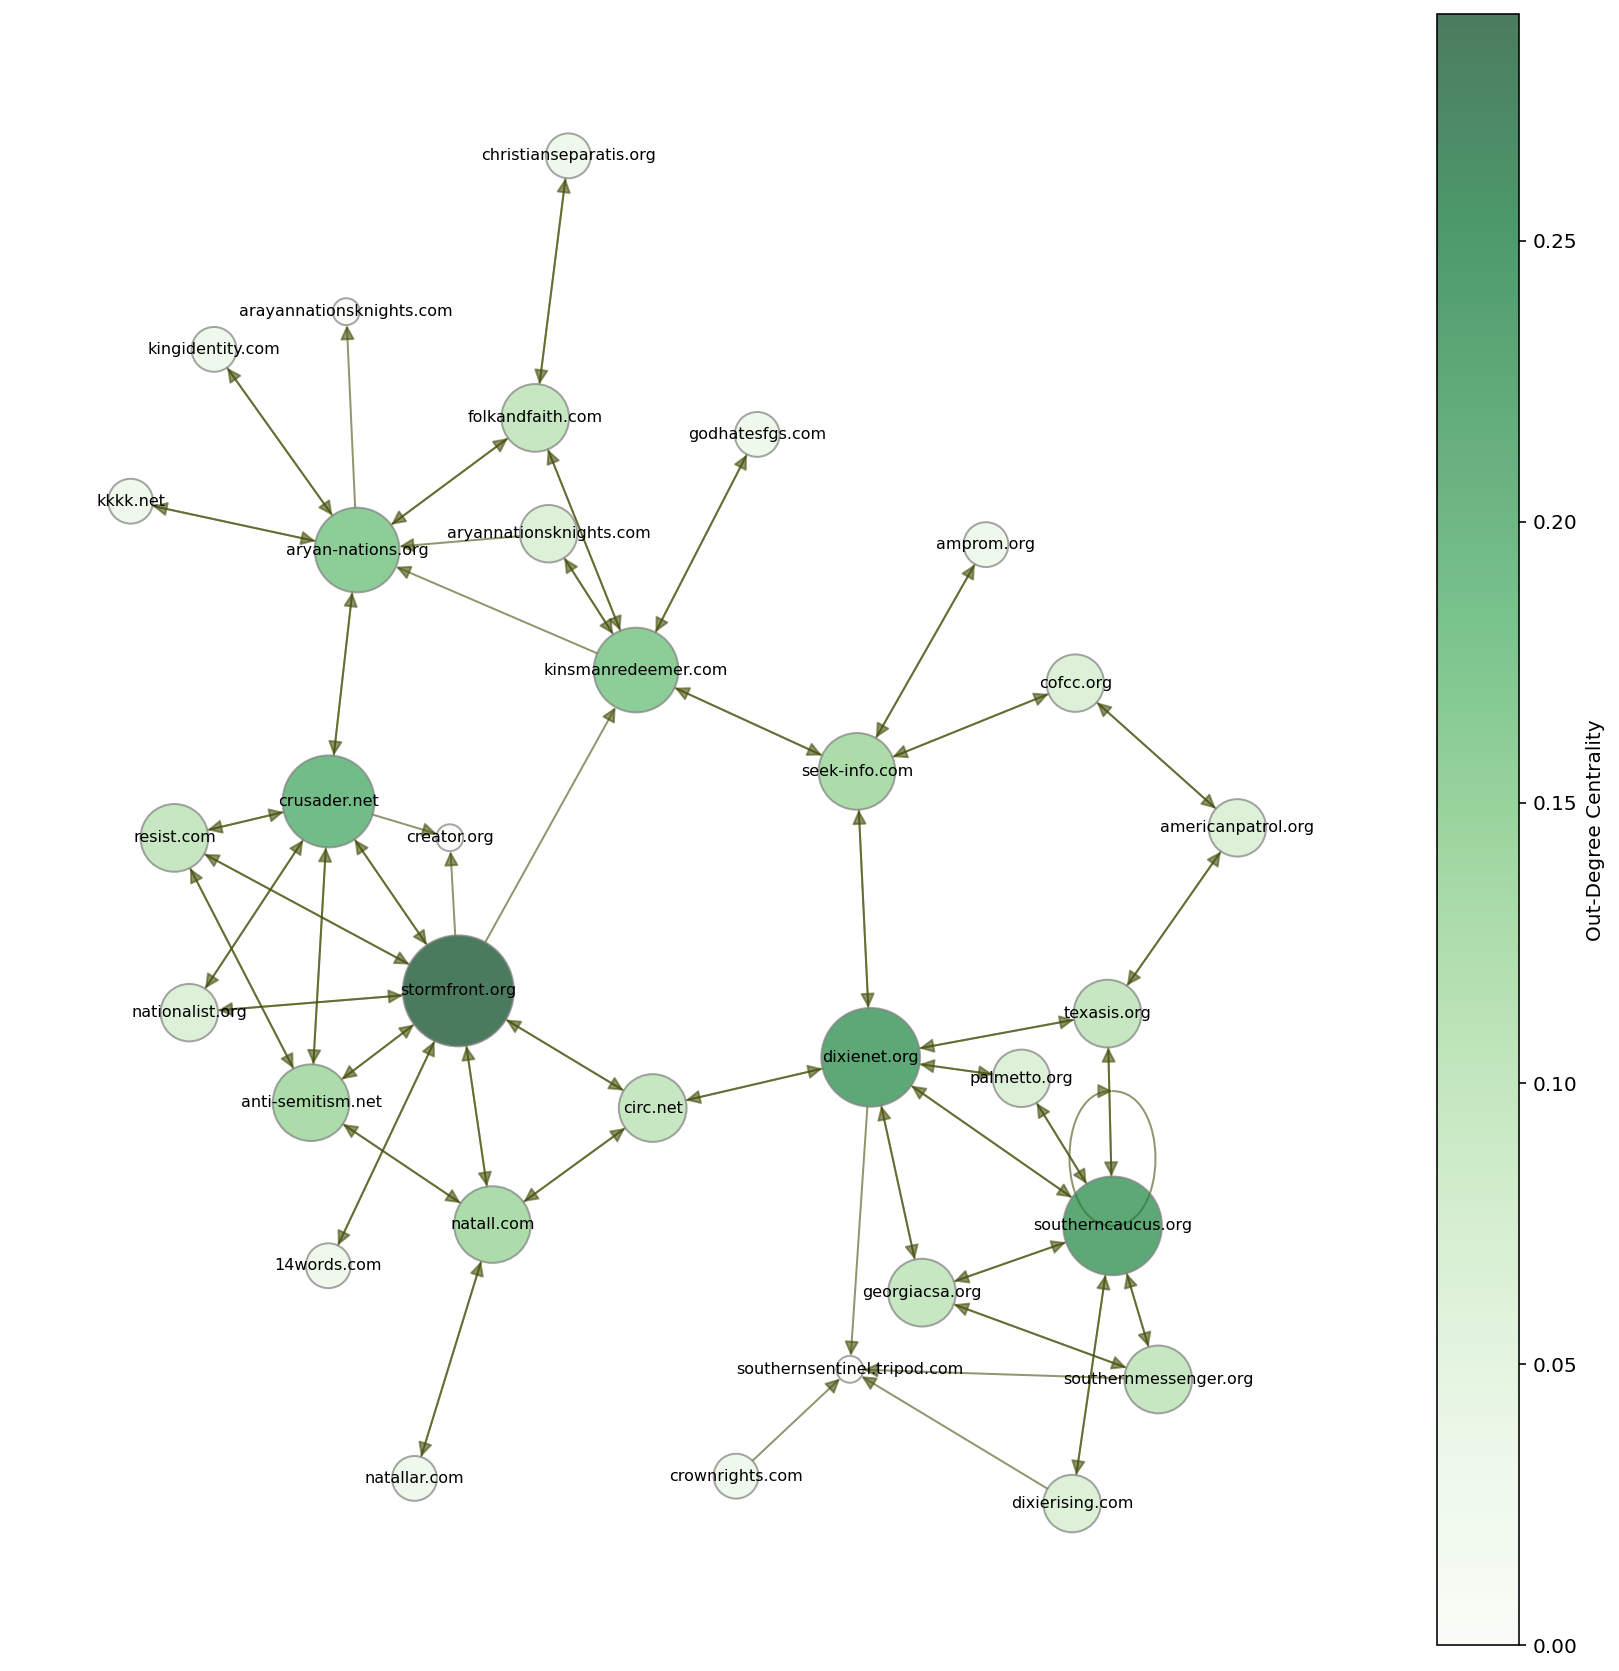

In [66]:
# Out-Degree Graph

# calculate the size of each node based on out-degree centrality
out_degree_centrality = nx.out_degree_centrality(G_directed)
node_size = [v * 10000 + 180 for v in out_degree_centrality.values()]

# Color map based on out-degree centrality
colors = [out_degree_centrality.get(node, 0) for node in G_directed.nodes()]

# draw graph
plt.figure(figsize=(15, 15))
nodes = nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color=colors, cmap=plt.cm.Greens, alpha=0.7)
nodes.set_edgecolor("grey")
edges = nx.draw_networkx_edges(G_directed, pos,node_size=node_size, arrows = True, edge_color=(0.28235,0.317647, 0.05490), arrowsize=15, alpha=0.6)

nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')

# add legend
plt.colorbar(nodes, label='Out-Degree Centrality')

plt.axis('off')
plt.show()

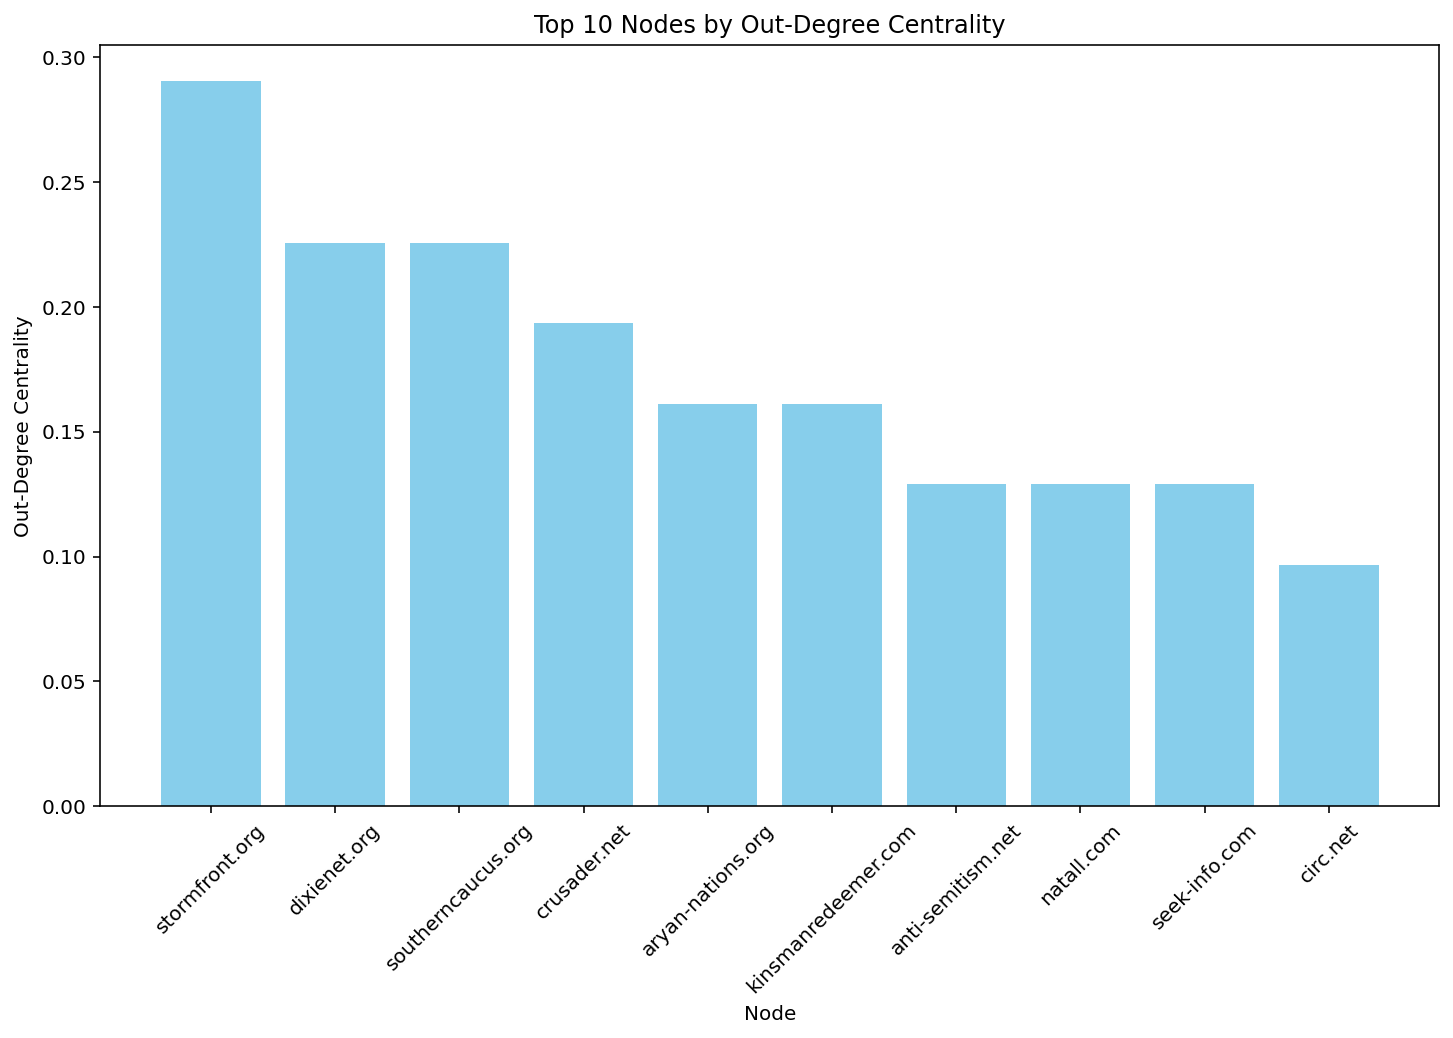

In [20]:
n = 10

# Calculate out-degree centrality
out_degree_centrality = nx.out_degree_centrality(G_directed)
top_n_out_degree_nodes = sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

nodes = [node for node, centrality in top_n_out_degree_nodes]
centralities = [centrality for node, centrality in top_n_out_degree_nodes]

# Create insogram
plt.figure(figsize=(12, 7))
plt.bar(nodes, centralities, color='skyblue')
plt.title('Top 10 Nodes by Out-Degree Centrality')
plt.xlabel('Node')
plt.ylabel('Out-Degree Centrality')
plt.xticks(rotation=45)

plt.show()


#### Right\-Eigenvector Centrality



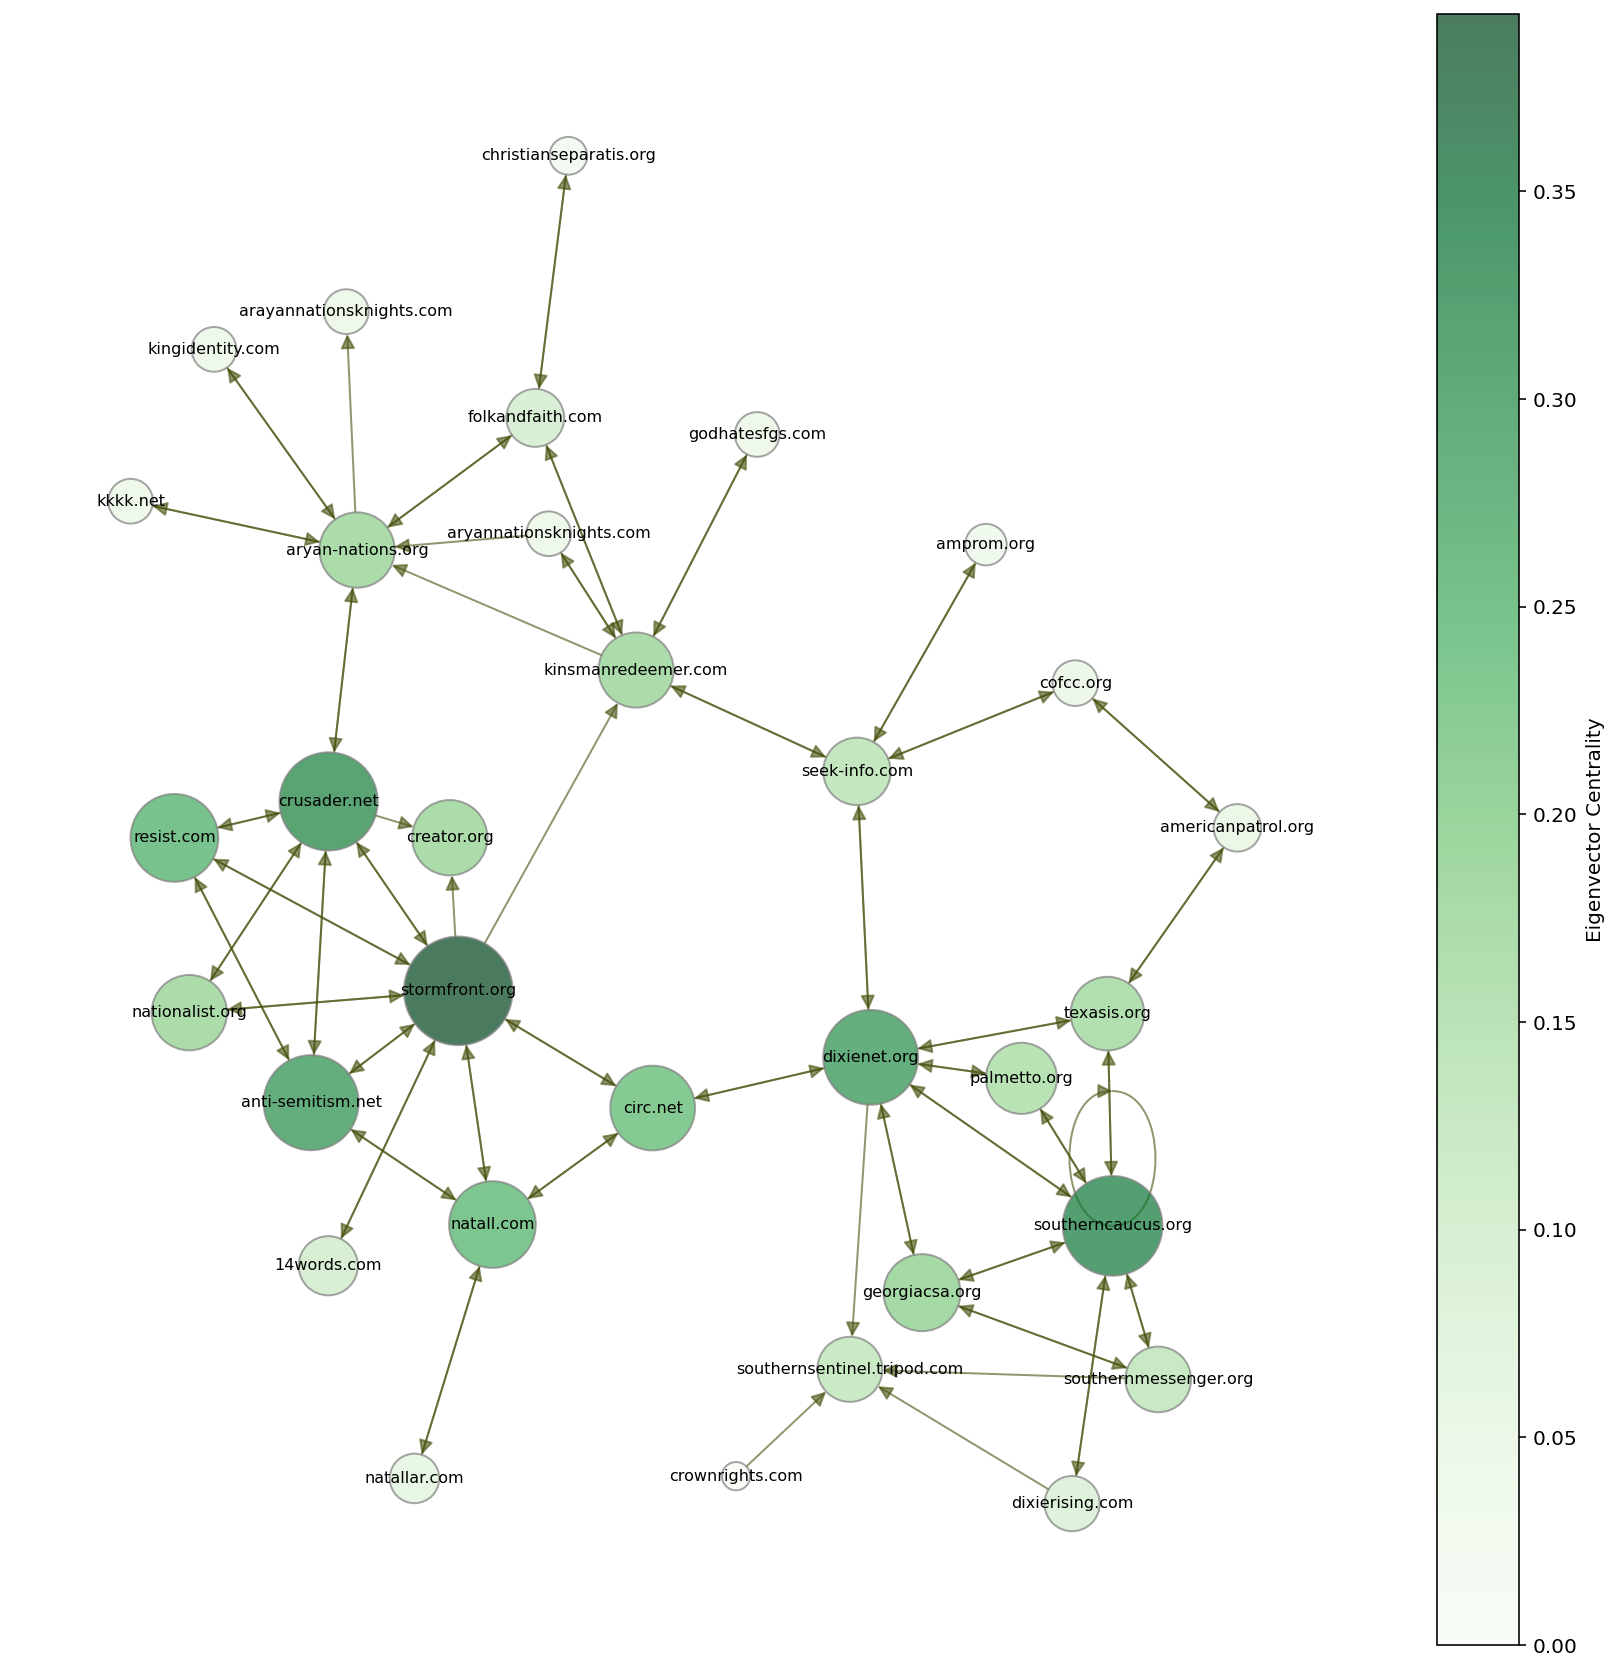

In [73]:
# Eigenvector Centrality Graph

# calculate the size of each node based on eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality_numpy(G_directed, max_iter=500)
node_size = [v * 7000 + 200 for v in eigenvector_centrality.values()]

# Color map based on Eigenvector centrality
colors = [eigenvector_centrality.get(node, 0) for node in G_directed.nodes()]

# draw graph
plt.figure(figsize=(15, 15))
nodes = nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color=colors, cmap=plt.cm.Greens, alpha=0.7)
nodes.set_edgecolor("grey")
edges = nx.draw_networkx_edges(G_directed, pos,node_size=node_size, arrows = True, edge_color=(0.28235,0.317647, 0.05490), arrowsize=15, alpha=0.6)

nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')

# add legend
plt.colorbar(nodes, label='Eigenvector Centrality')

plt.axis('off')
plt.show()

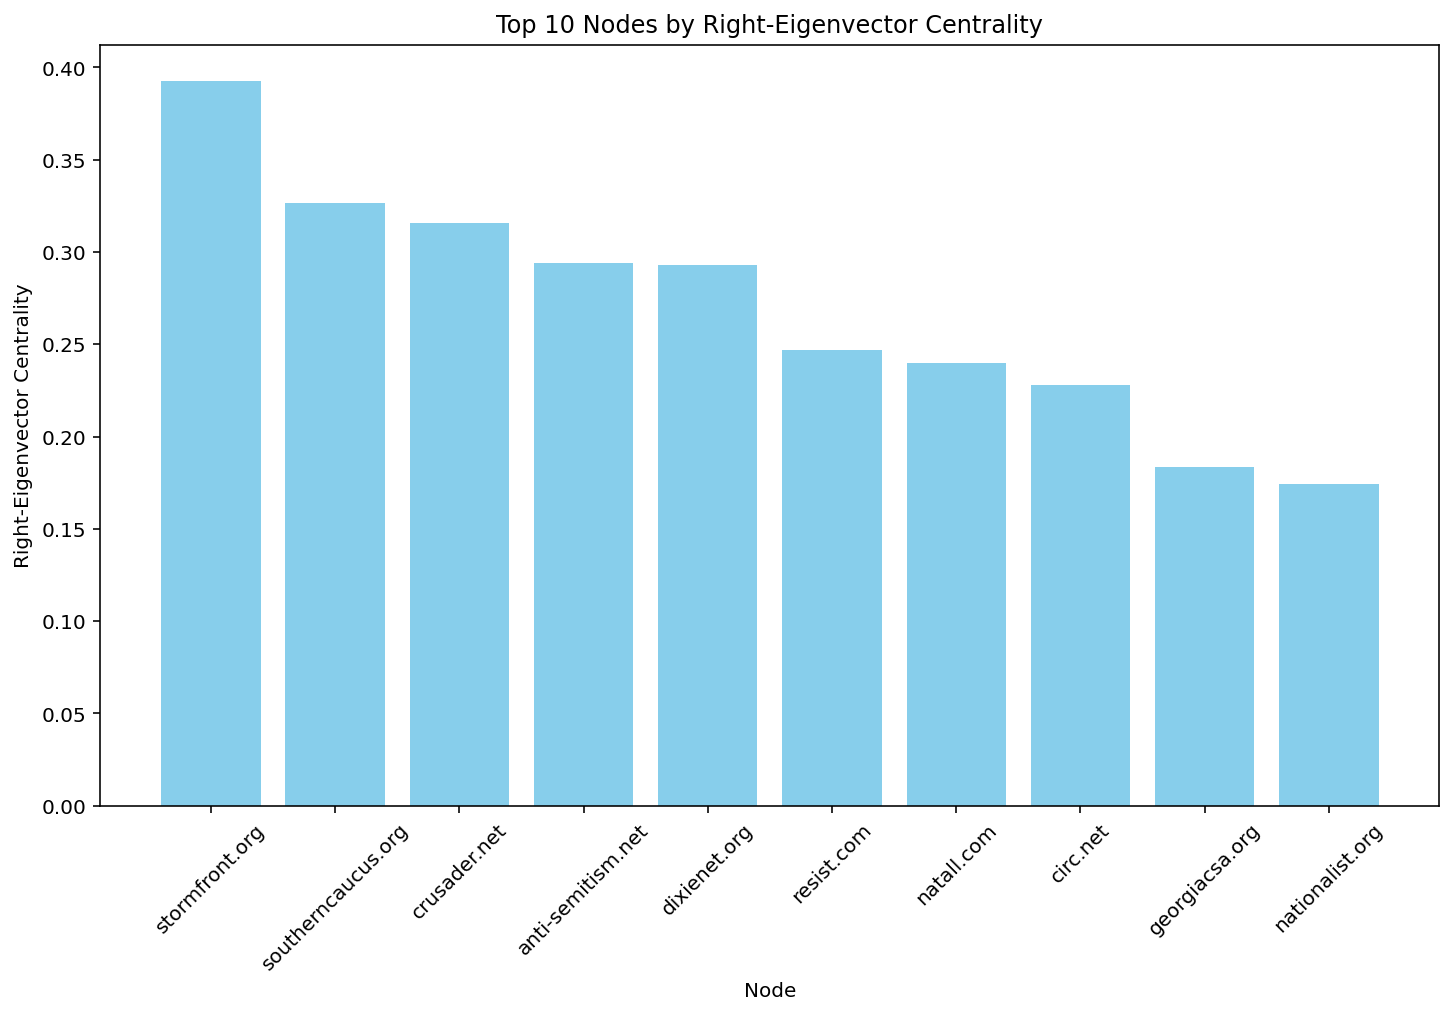

In [19]:
n = 10  # number of node

# calculate right-eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality_numpy(G_directed)
top_n_eigenvector_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

# Extracting node names and centrality values into separate lists
nodes = [node for node, centrality in top_n_eigenvector_nodes]
centralities = [centrality for node, centrality in top_n_eigenvector_nodes]

# Creation of the histogram
plt.figure(figsize=(12, 7))  
plt.bar(nodes, centralities, color='skyblue')  
plt.title('Top 10 Nodes by Right-Eigenvector Centrality')
plt.xlabel('Node')
plt.ylabel('Right-Eigenvector Centrality')

plt.xticks(rotation=45)  
plt.show()


#### Katz Centrality



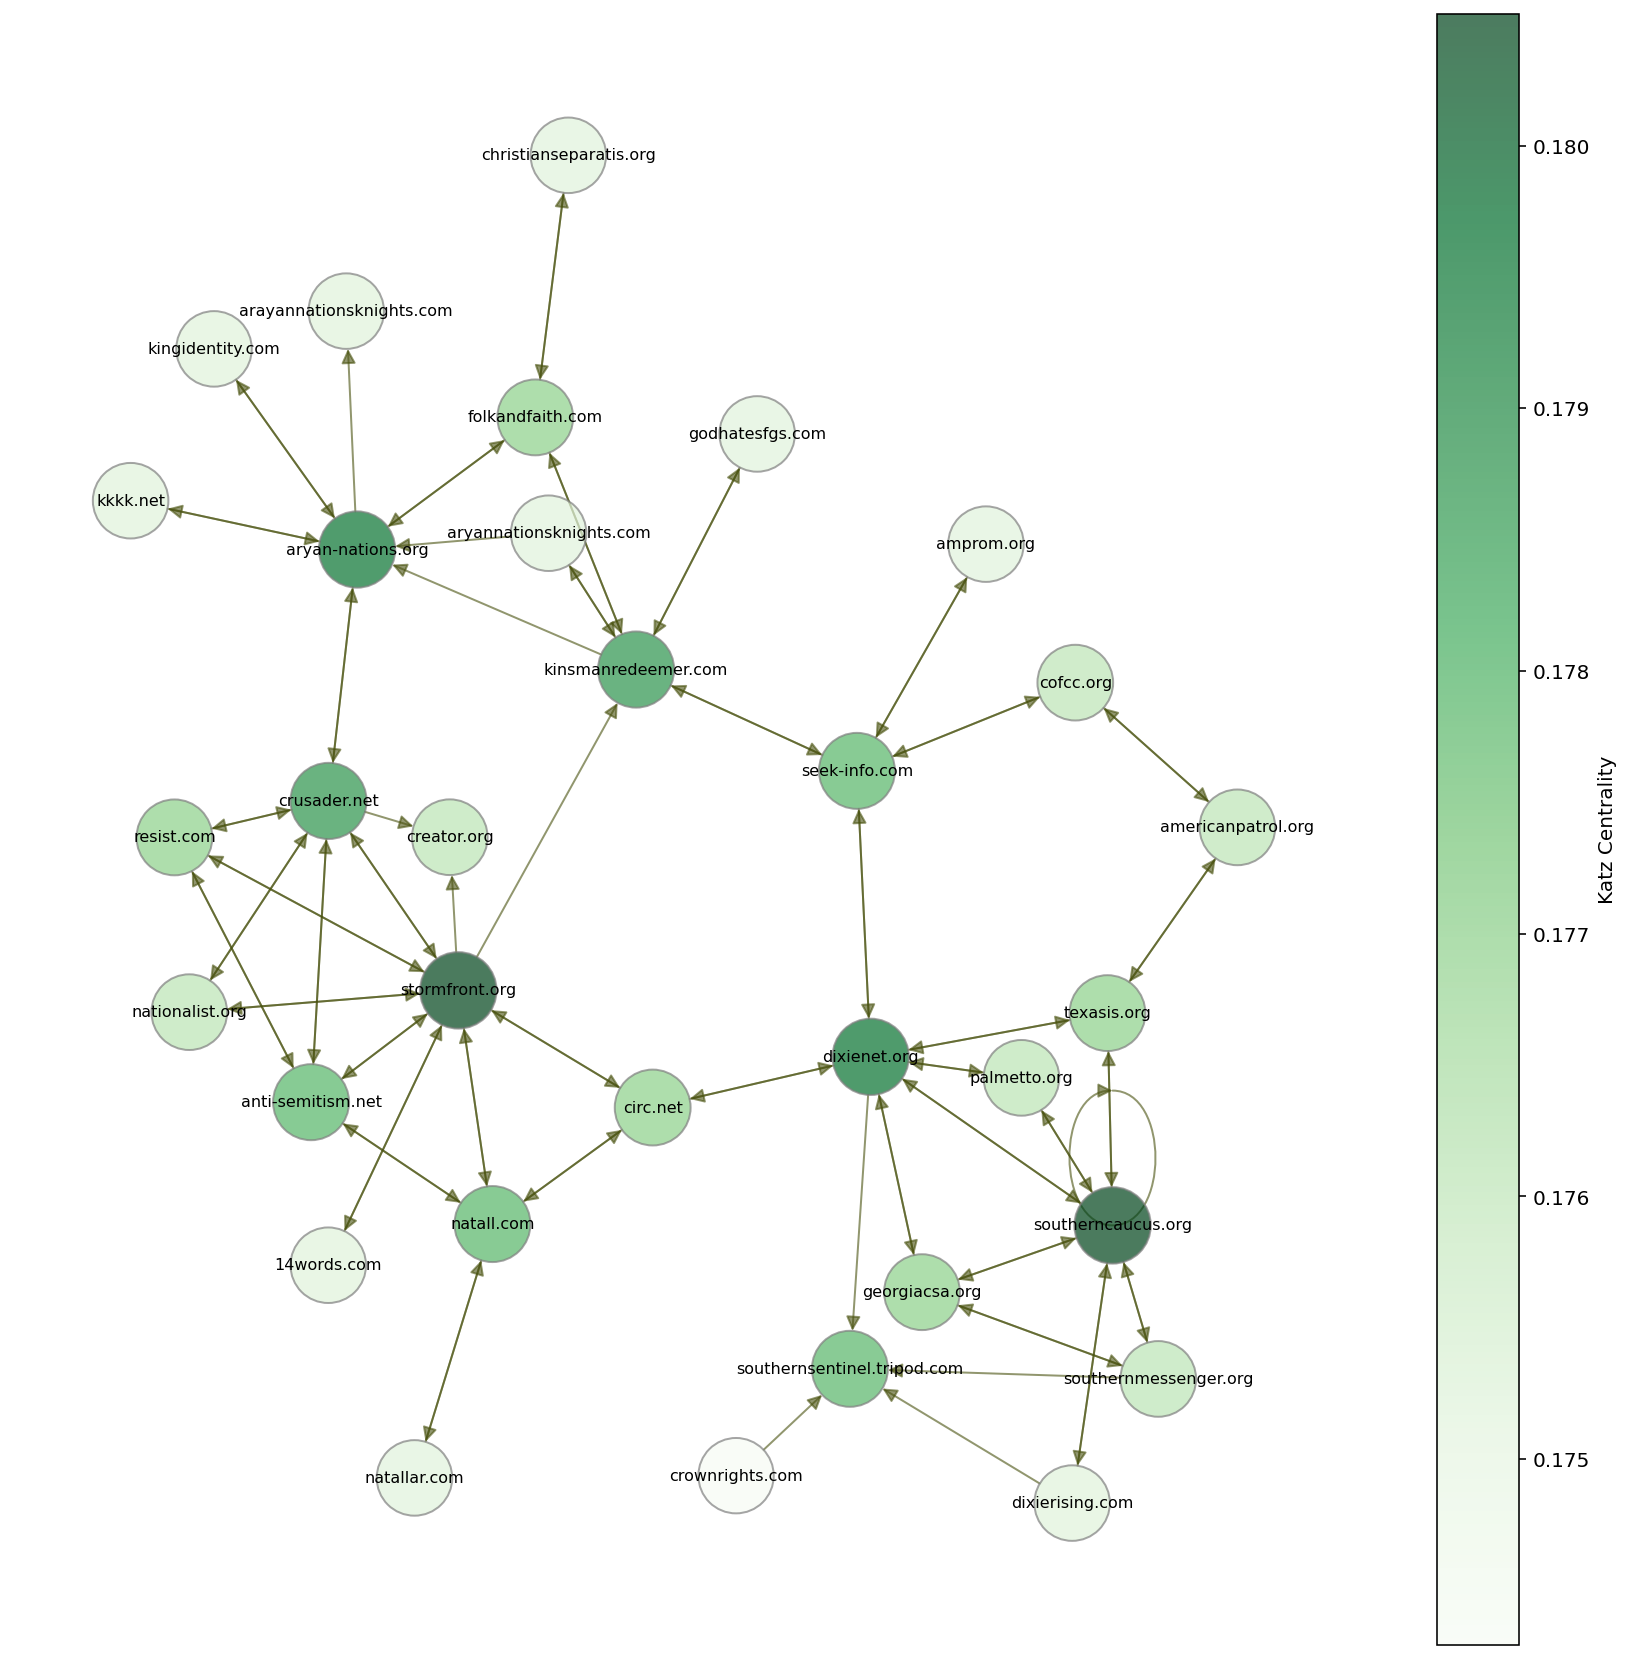

In [25]:
# Katz Centrality Graph

# calculate the size of each node based on katz centrality
katz_centrality = nx.katz_centrality(G_directed, alpha=0.005, max_iter=500)
node_size = [v * 7000 + 200 for v in katz_centrality.values()]

# Color map based on Katz centrality
colors = [katz_centrality.get(node, 0) for node in G_directed.nodes()]

# draw graph
plt.figure(figsize=(15, 15))
nodes = nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color=colors, cmap=plt.cm.Greens, alpha=0.7)
nodes.set_edgecolor("grey")
edges = nx.draw_networkx_edges(G_directed, pos,node_size=node_size, arrows = True, edge_color=(0.28235,0.317647, 0.05490), arrowsize=15, alpha=0.6)

nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')

# add legend
plt.colorbar(nodes, label='Katz Centrality')

plt.axis('off')
plt.show()

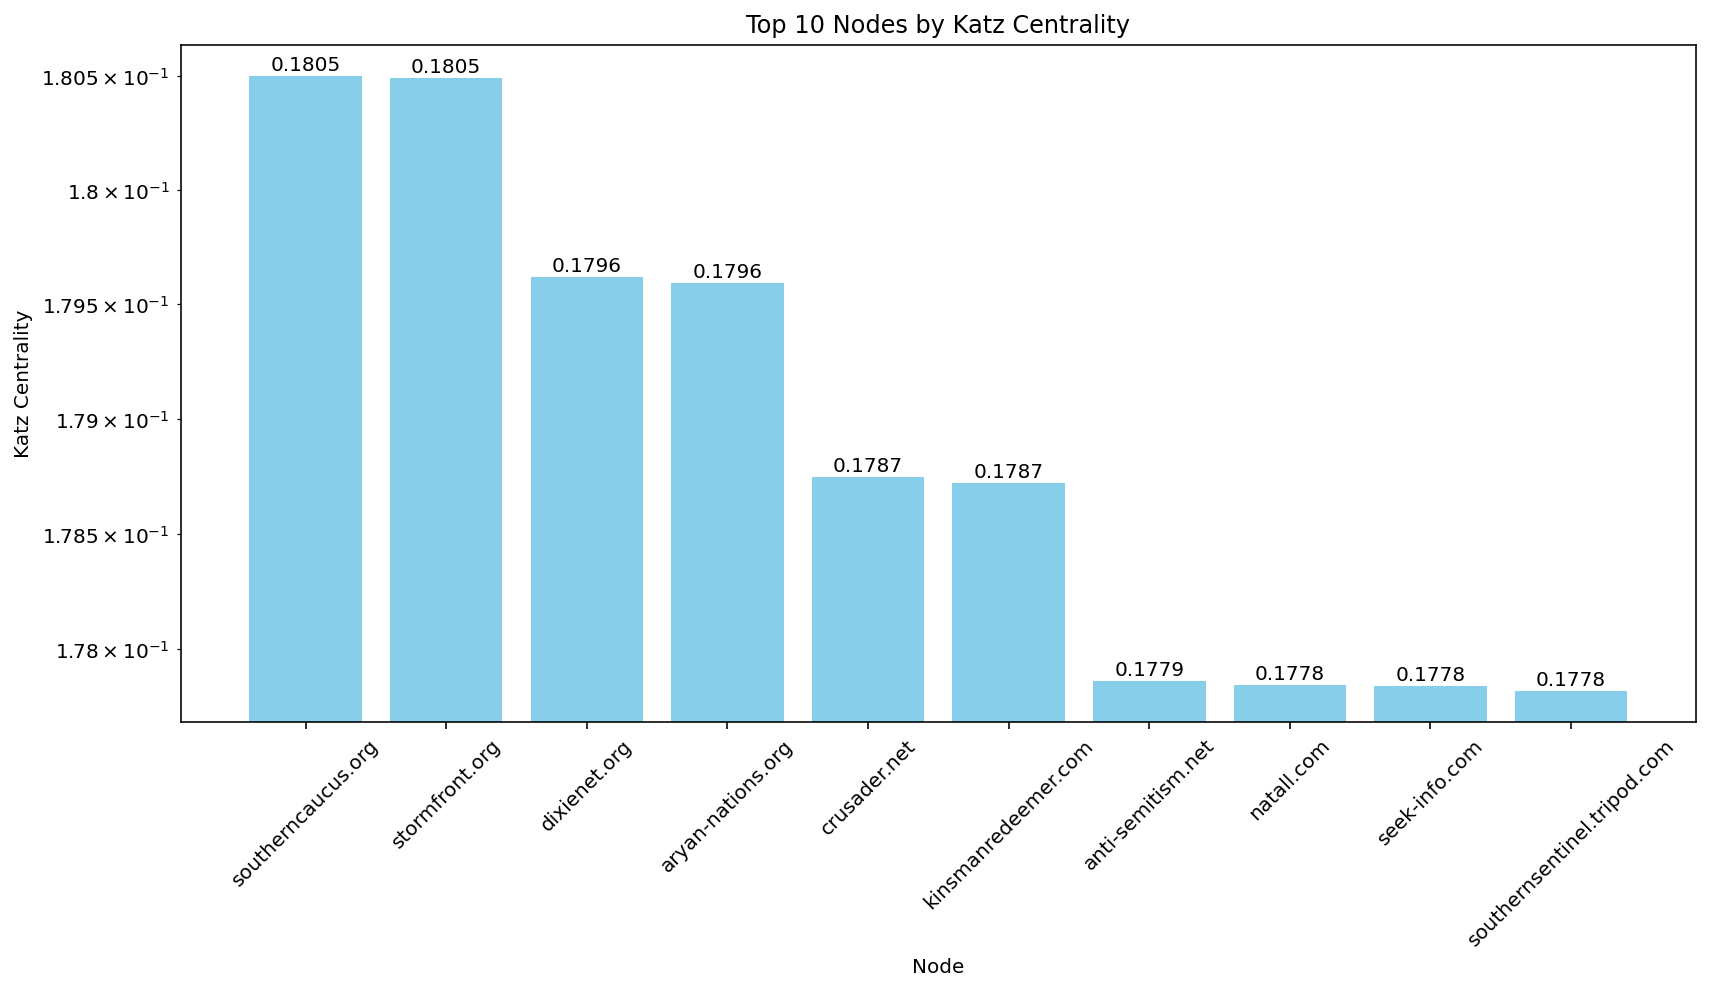

In [31]:
n = 10  # number of node

# calculate katz centrality
katz_centrality = nx.katz_centrality(G_directed, alpha=0.005, max_iter=500)
top_n_katz_nodes = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

# Extracting node names and centrality values into separate lists
nodes = [node for node, centrality in top_n_katz_nodes]
centralities = [centrality for node, centrality in top_n_katz_nodes]

# Creation of the histogram
plt.figure(figsize=(12, 7))
bars = plt.bar(nodes, centralities, color='skyblue')

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.000005, round(yval, 4), ha='center', va='bottom')

plt.title('Top 10 Nodes by Katz Centrality')
plt.xlabel('Node')
plt.ylabel('Katz Centrality')

plt.xticks(rotation=45)
plt.yscale('log')  # Set the y-scale to logarithmic

plt.tight_layout()  
plt.show()


#### Hyperlink\-Induced Topic Search \(HITS\): Authority



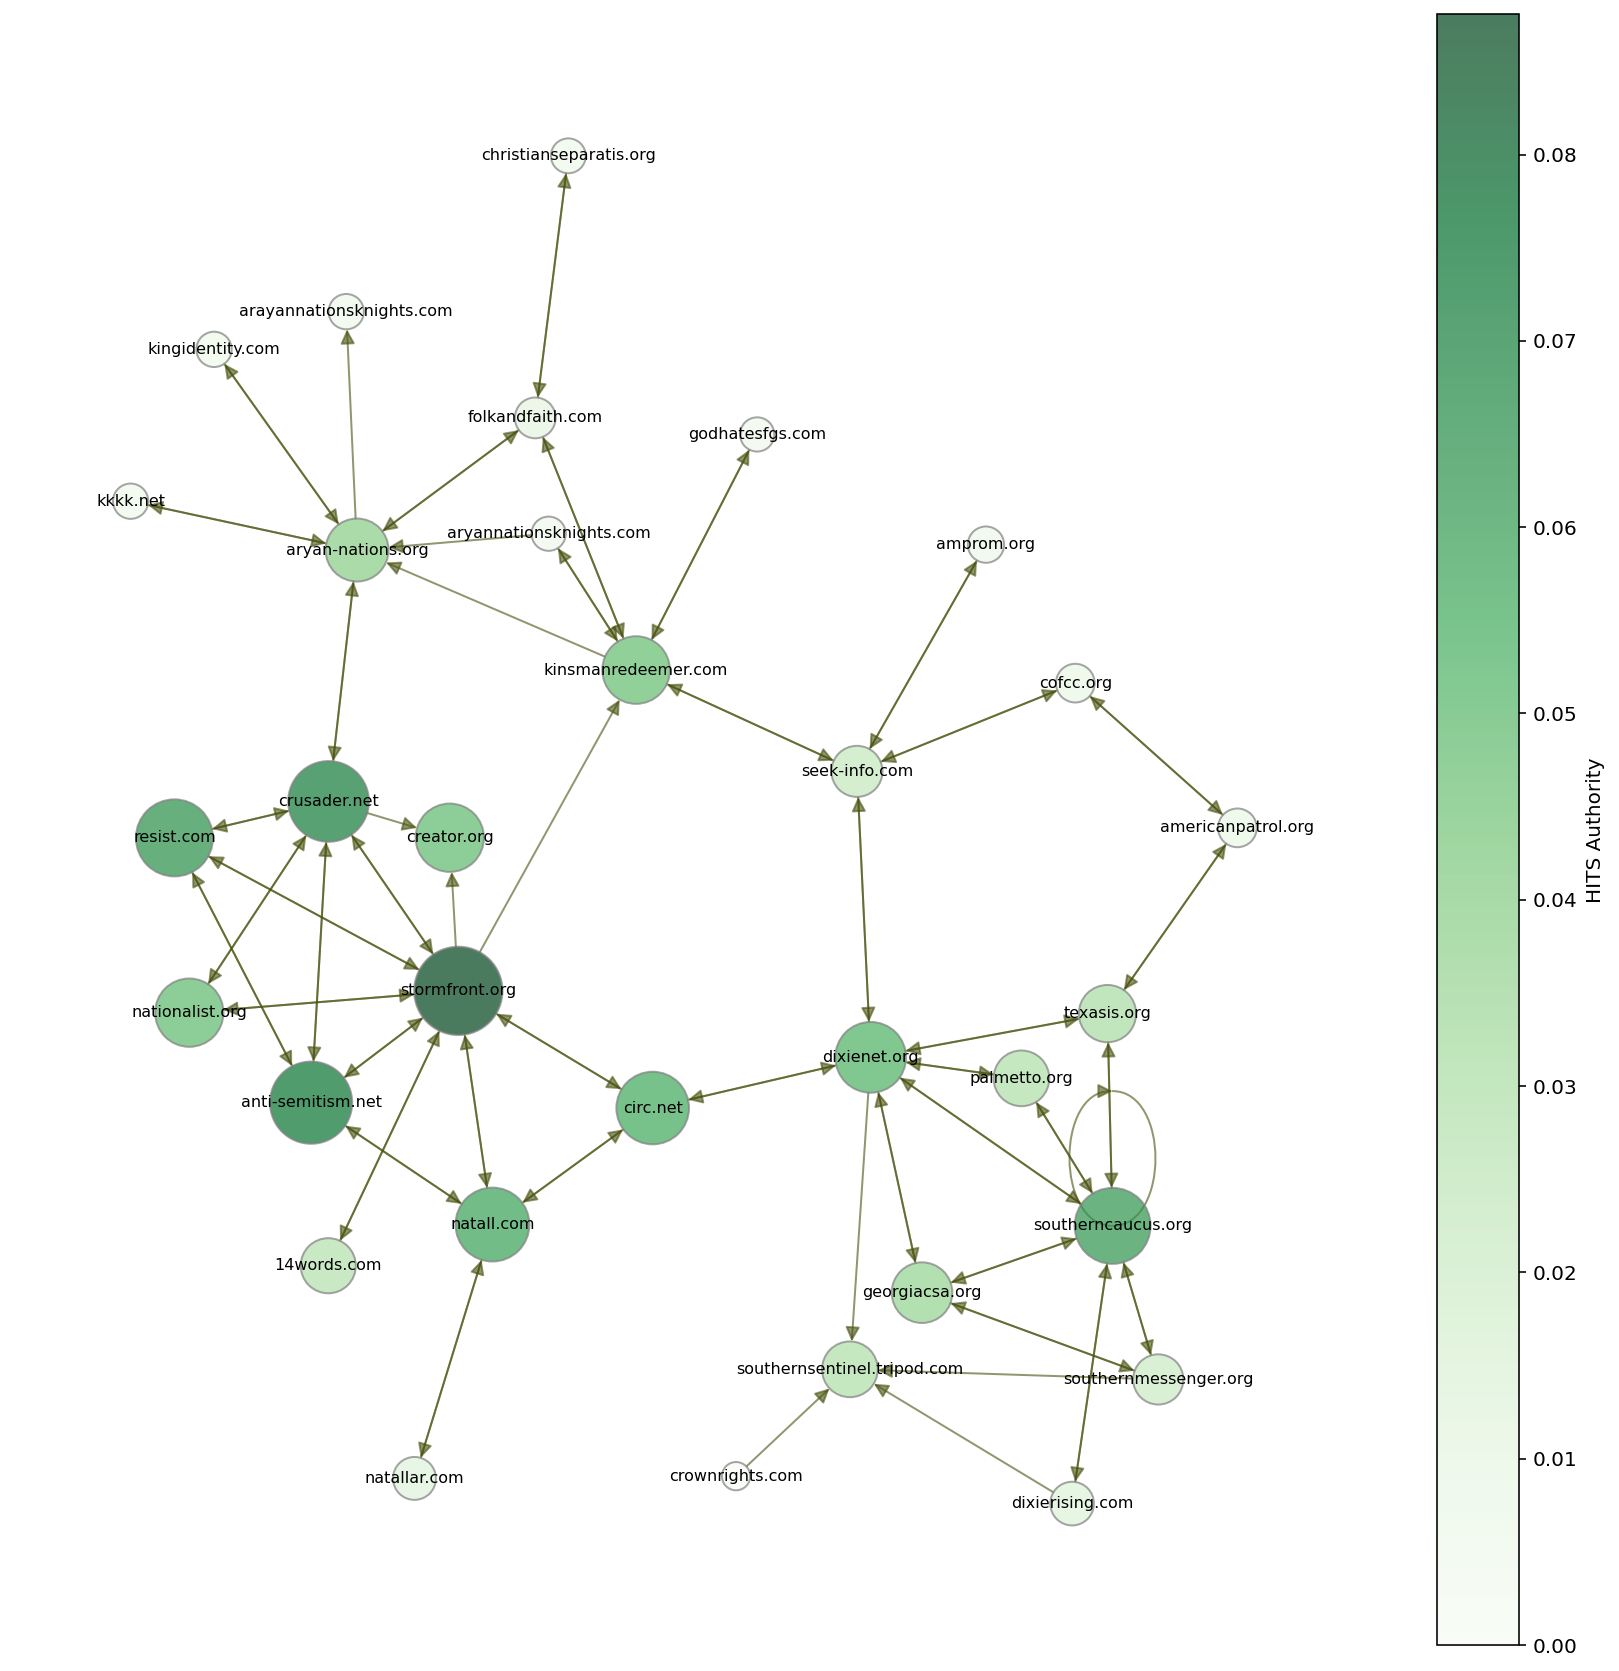

In [30]:
# calculate HITS authorities
hubs, authorities = nx.hits(G_directed, max_iter=500)

# Use HITS authorities for node size
node_size = [authorities[node] * 20000 + 200 for node in G_directed.nodes()]

# Color map based on HITS authorities
colors = [authorities.get(node, 0) for node in G_directed.nodes()]

# draw graph
plt.figure(figsize=(15, 15))
nodes = nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color=colors, cmap=plt.cm.Greens, alpha=0.7)
nodes.set_edgecolor("grey")
edges = nx.draw_networkx_edges(G_directed, pos, node_size=node_size, arrows=True, edge_color=(0.28235,0.317647, 0.05490), arrowsize=15, alpha=0.6)

nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')

# add legend
plt.colorbar(nodes, label='HITS Authority')

plt.axis('off')
plt.show()

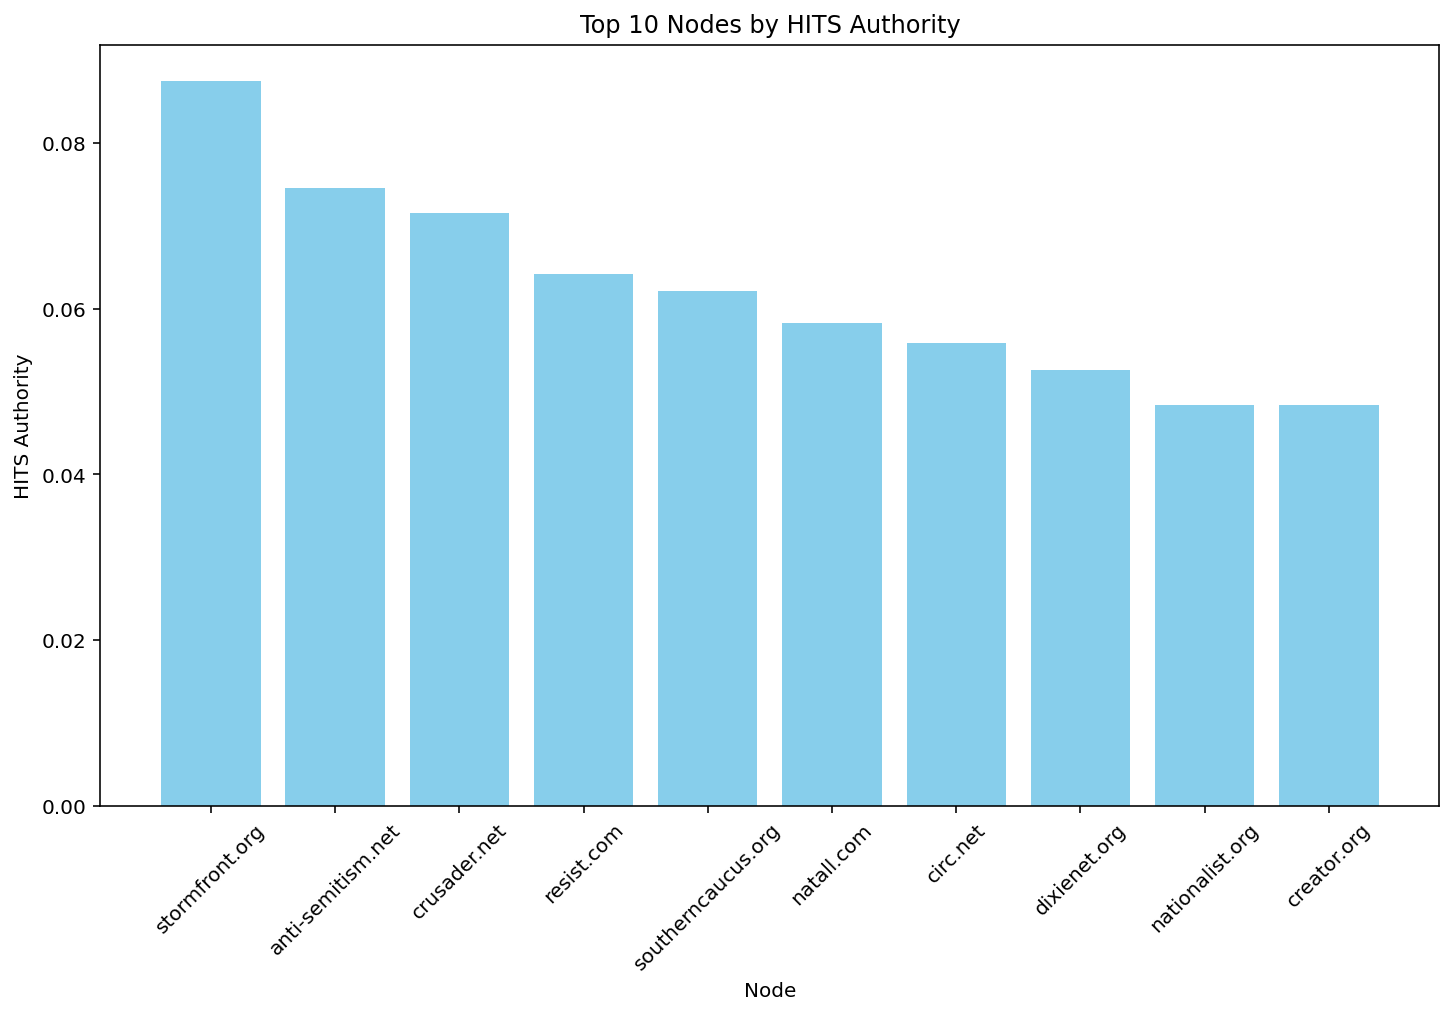

In [32]:
n = 10  # number of nodes to display

# calculate HITS authorities and hubs (only authorities will be used here)
hubs, authorities = nx.hits(G_directed)

# Sort the nodes by authority scores and get the top n
top_n_authority_nodes = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:n]

# Extracting node names and authority values into separate lists
nodes = [node for node, authority in top_n_authority_nodes]
authority_values = [authority for node, authority in top_n_authority_nodes]

# Creation of the histogram
plt.figure(figsize=(12, 7))
plt.bar(nodes, authority_values, color='skyblue')
plt.title('Top 10 Nodes by HITS Authority')
plt.xlabel('Node')
plt.ylabel('HITS Authority')

plt.xticks(rotation=45)
plt.show()


#### Hyperlink\-Induced Topic Search \(HITS\): Hubs



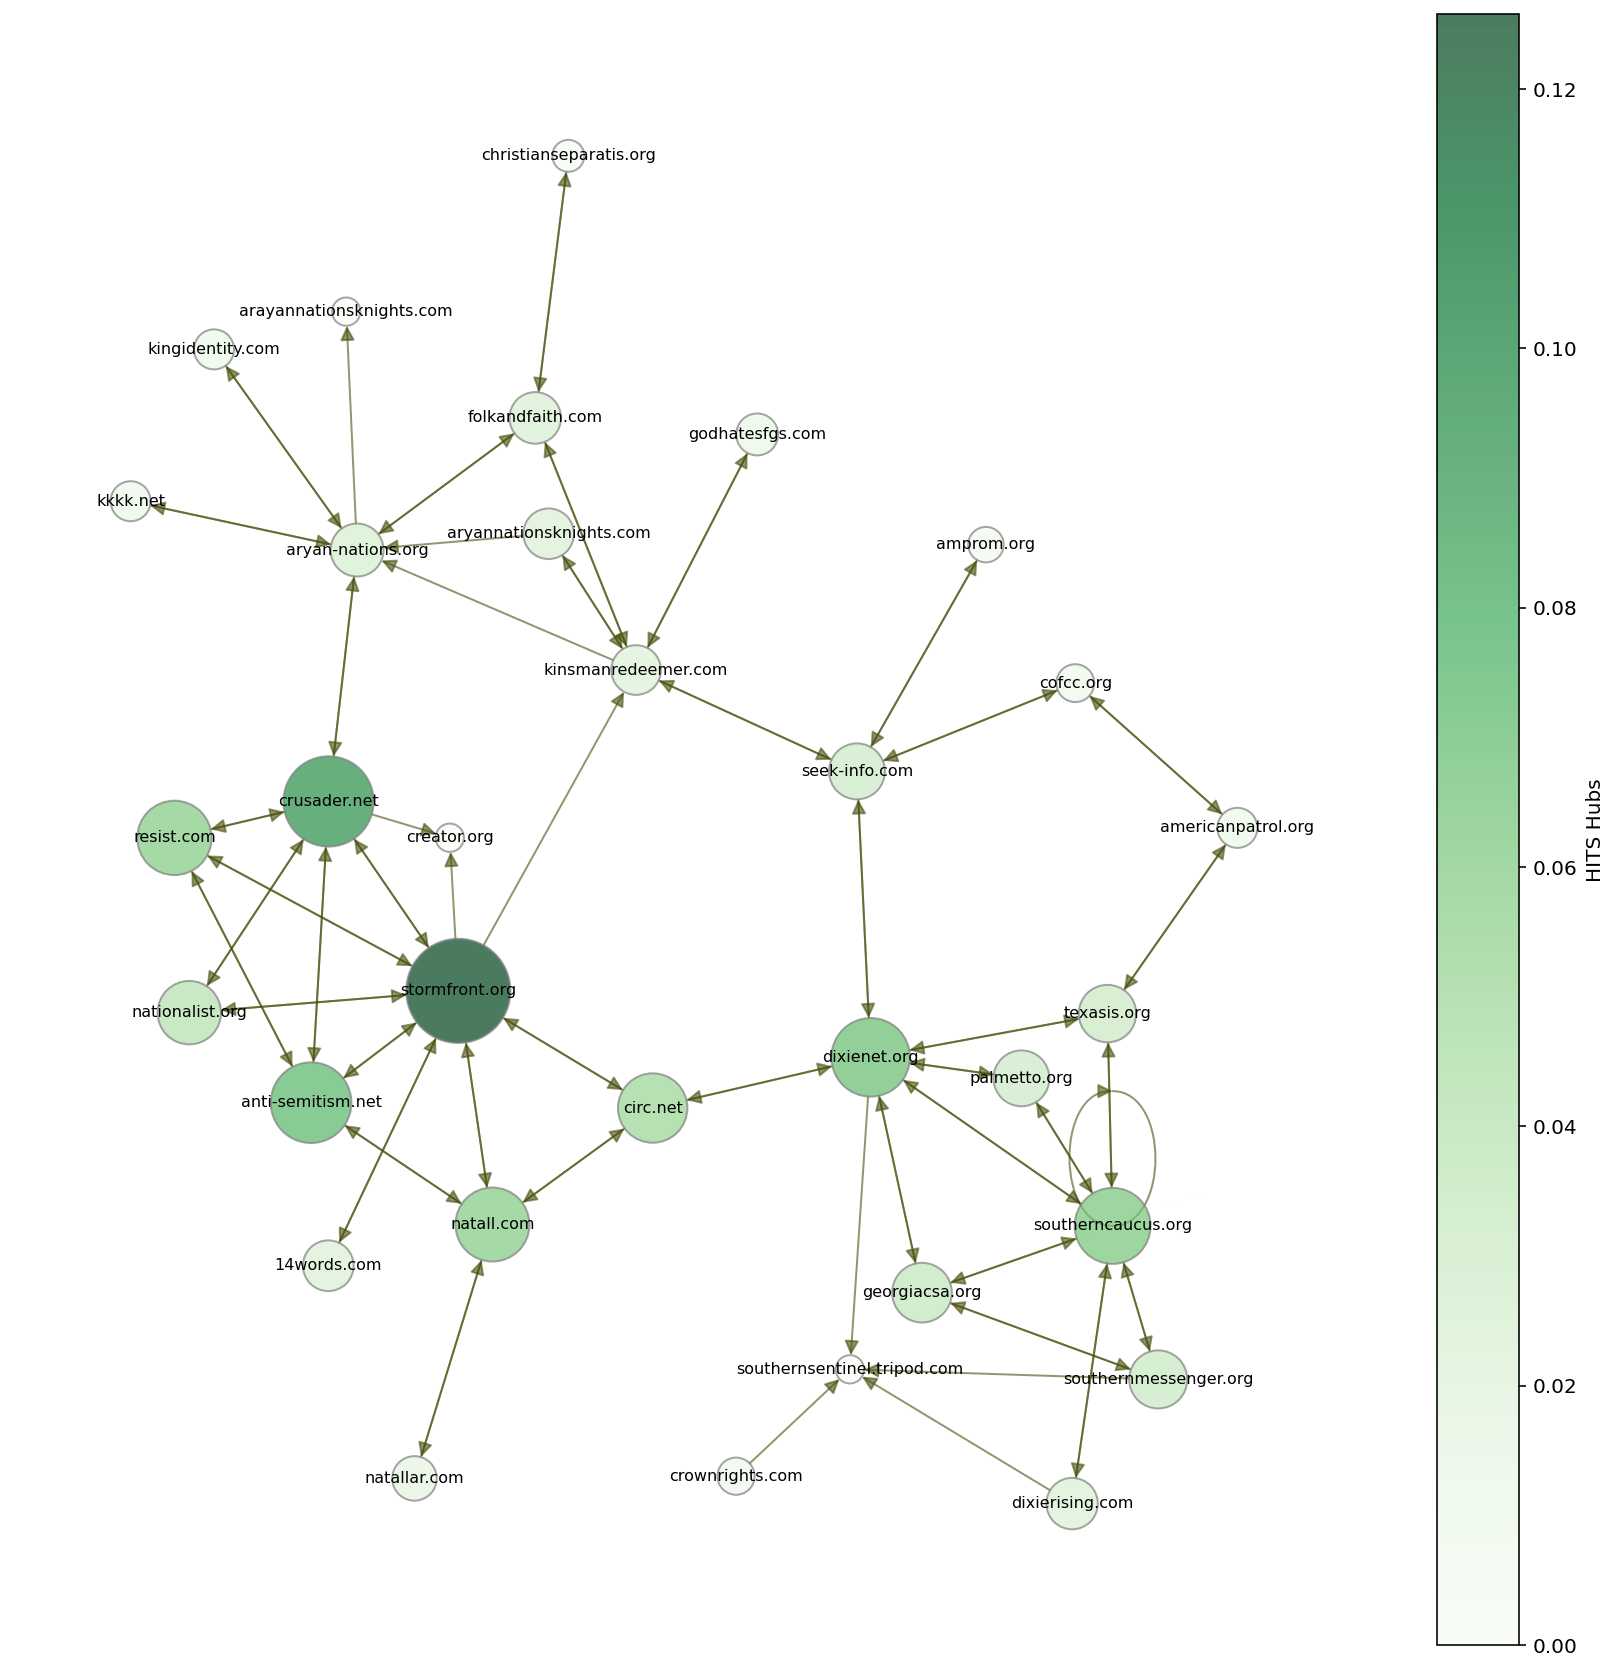

In [33]:
# calculate HITS hubs
hubs, authorities = nx.hits(G_directed, max_iter=500)

# Use HITS hubs for node size
node_size = [hubs[node] * 20000 + 200 for node in G_directed.nodes()]

# Color map based on HITS hubs
colors = [hubs.get(node, 0) for node in G_directed.nodes()]

# draw graph
plt.figure(figsize=(15, 15))
nodes = nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color=colors, cmap=plt.cm.Greens, alpha=0.7)
nodes.set_edgecolor("grey")
edges = nx.draw_networkx_edges(G_directed, pos, node_size=node_size, arrows=True, edge_color=(0.28235,0.317647, 0.05490), arrowsize=15, alpha=0.6)

nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')

# add legend
plt.colorbar(nodes, label='HITS Hubs')

plt.axis('off')
plt.show()

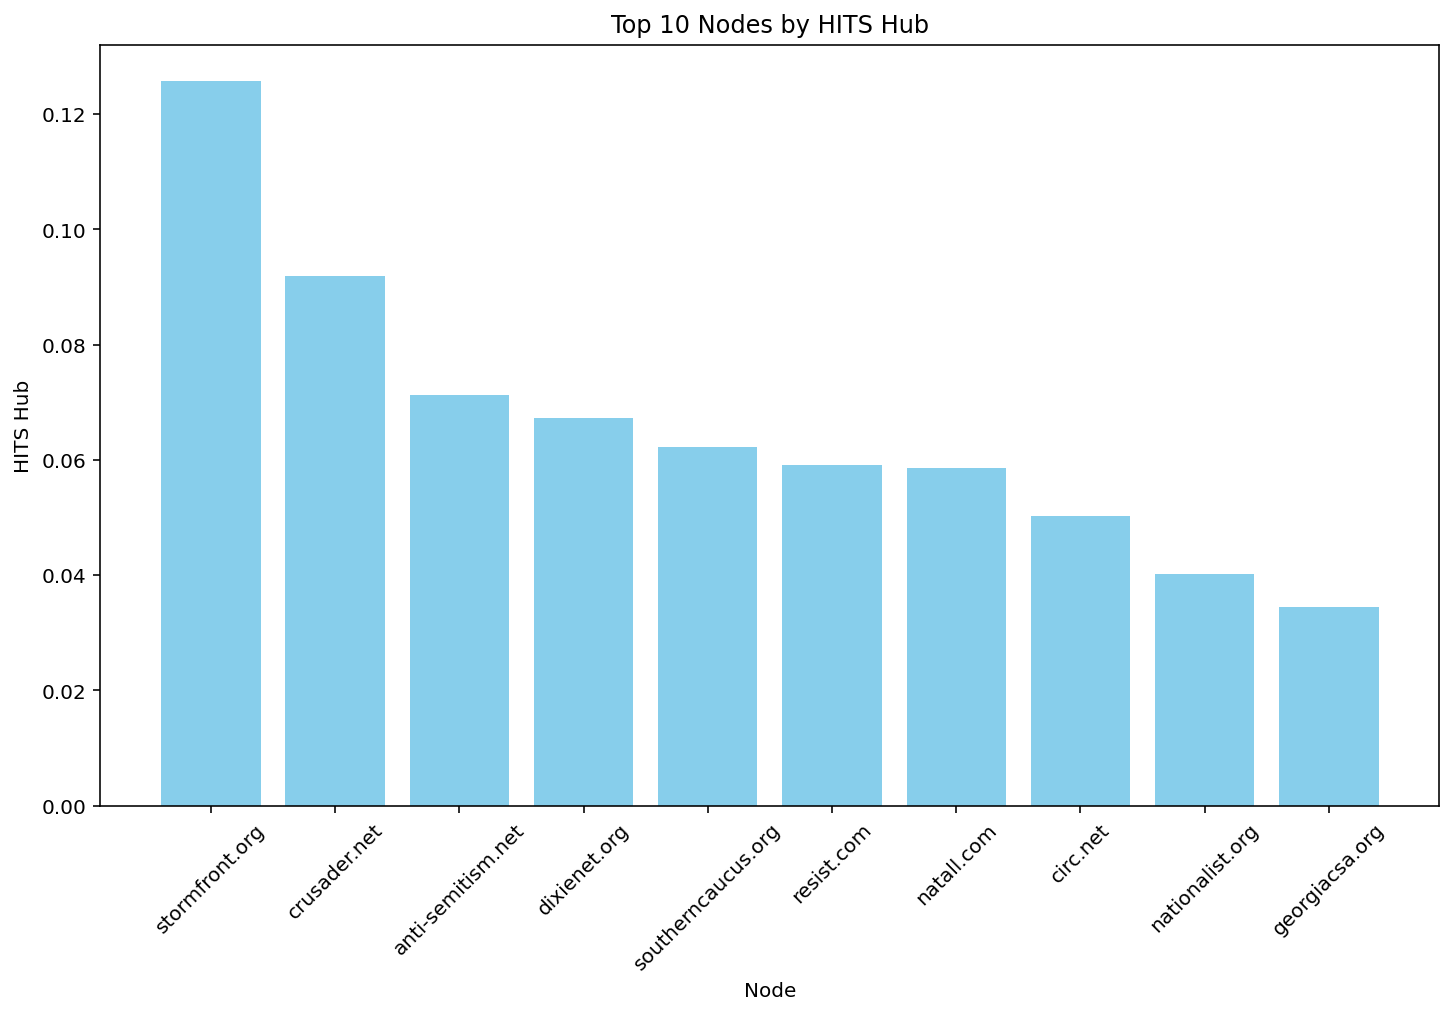

In [34]:
n = 10  # number of nodes to display

# calculate HITS authorities and hubs (only hubs will be used here)
hubs, authorities = nx.hits(G_directed)

# Sort the nodes by authority scores and get the top n
top_n_authority_nodes = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:n]

# Extracting node names and authority values into separate lists
nodes = [node for node, authority in top_n_authority_nodes]
authority_values = [authority for node, authority in top_n_authority_nodes]

# Creation of the histogram
plt.figure(figsize=(12, 7))
plt.bar(nodes, authority_values, color='skyblue')
plt.title('Top 10 Nodes by HITS Hub')
plt.xlabel('Node')
plt.ylabel('HITS Hub')

plt.xticks(rotation=45)
plt.show()


#### Closeness Centrality



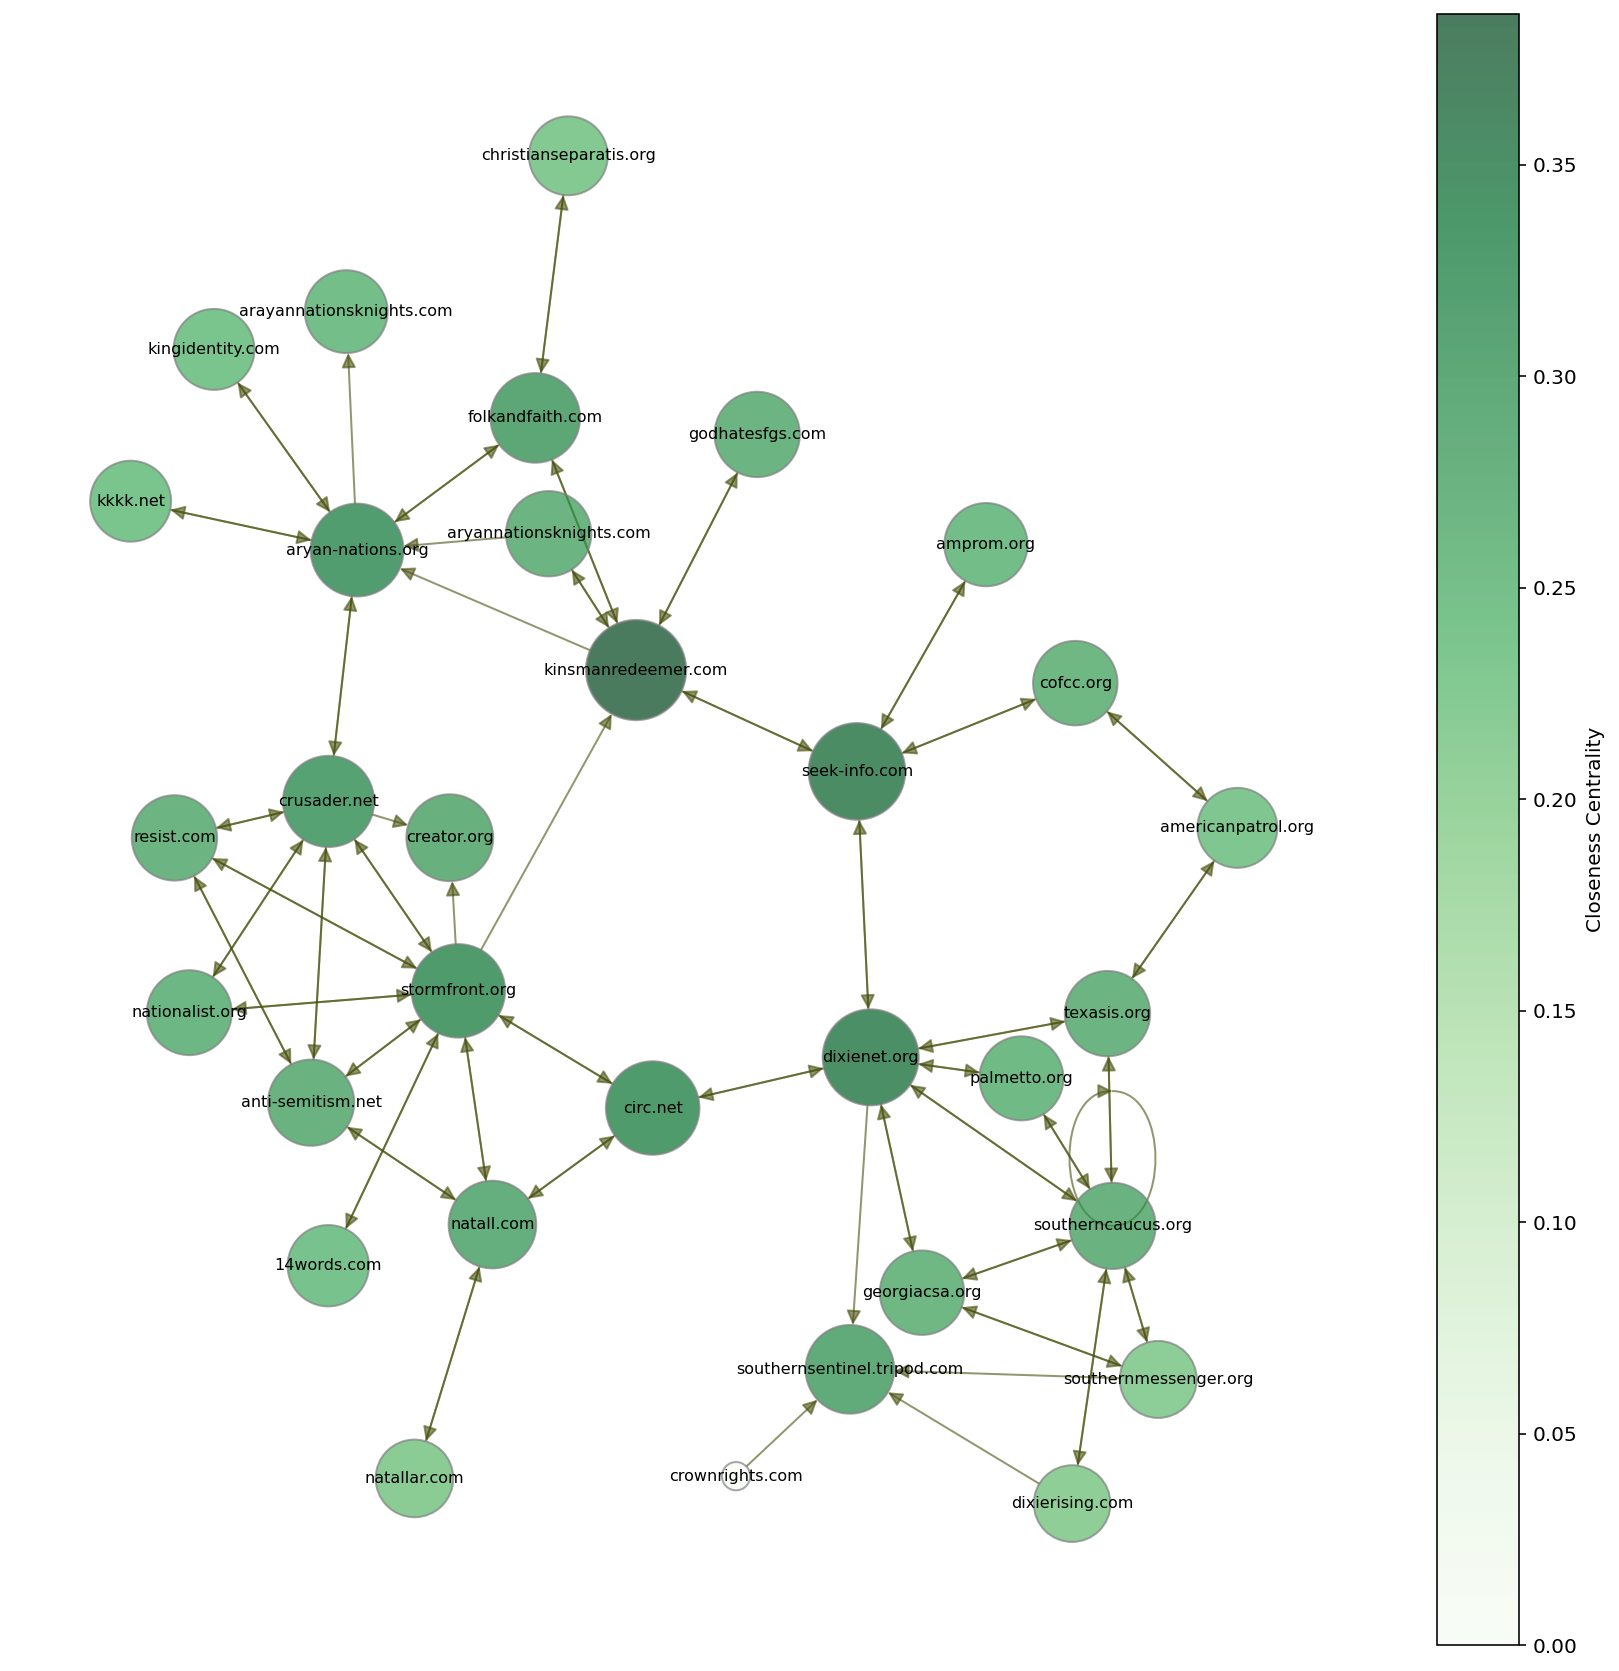

In [37]:
# Closeness Centrality Graph

# calculate the size of each node based on closeness centrality
closeness_centrality = nx.closeness_centrality(G_directed)
node_size = [v * 6000 + 200 for v in closeness_centrality.values()]

# Color map based on Closeness centrality
colors = [closeness_centrality.get(node, 0) for node in G_directed.nodes()]

# draw graph
plt.figure(figsize=(15, 15))
nodes = nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color=colors, cmap=plt.cm.Greens, alpha=0.7)
nodes.set_edgecolor("grey")
edges = nx.draw_networkx_edges(G_directed, pos,node_size=node_size, arrows = True, edge_color=(0.28235,0.317647, 0.05490), arrowsize=15, alpha=0.6)

nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')

# add legend
plt.colorbar(nodes, label='Closeness Centrality')

plt.axis('off')
plt.show()

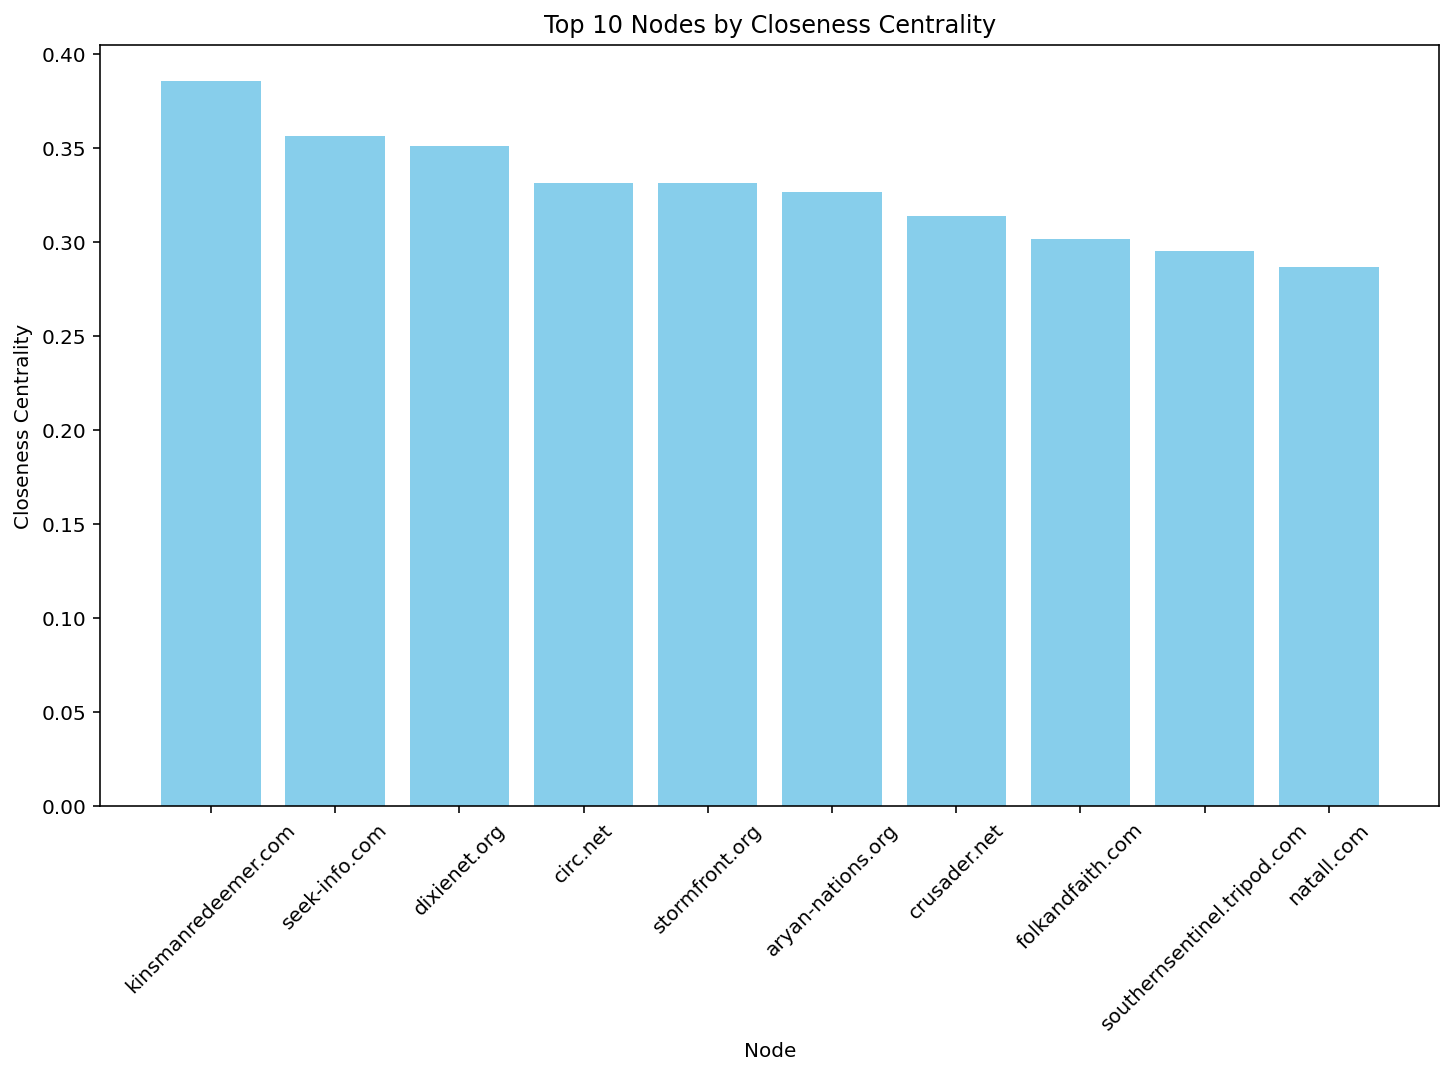

In [38]:
n = 10  # number of node

# calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G_directed)
top_n_closeness_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

# Extracting node names and centrality values into separate lists
nodes = [node for node, centrality in top_n_closeness_nodes]
centralities = [centrality for node, centrality in top_n_closeness_nodes]

# Creation of the histogram
plt.figure(figsize=(12, 7))  
plt.bar(nodes, centralities, color='skyblue')  
plt.title('Top 10 Nodes by Closeness Centrality')
plt.xlabel('Node')
plt.ylabel('Closeness Centrality')

plt.xticks(rotation=45)  
plt.show()


#### Betweenness Centrality



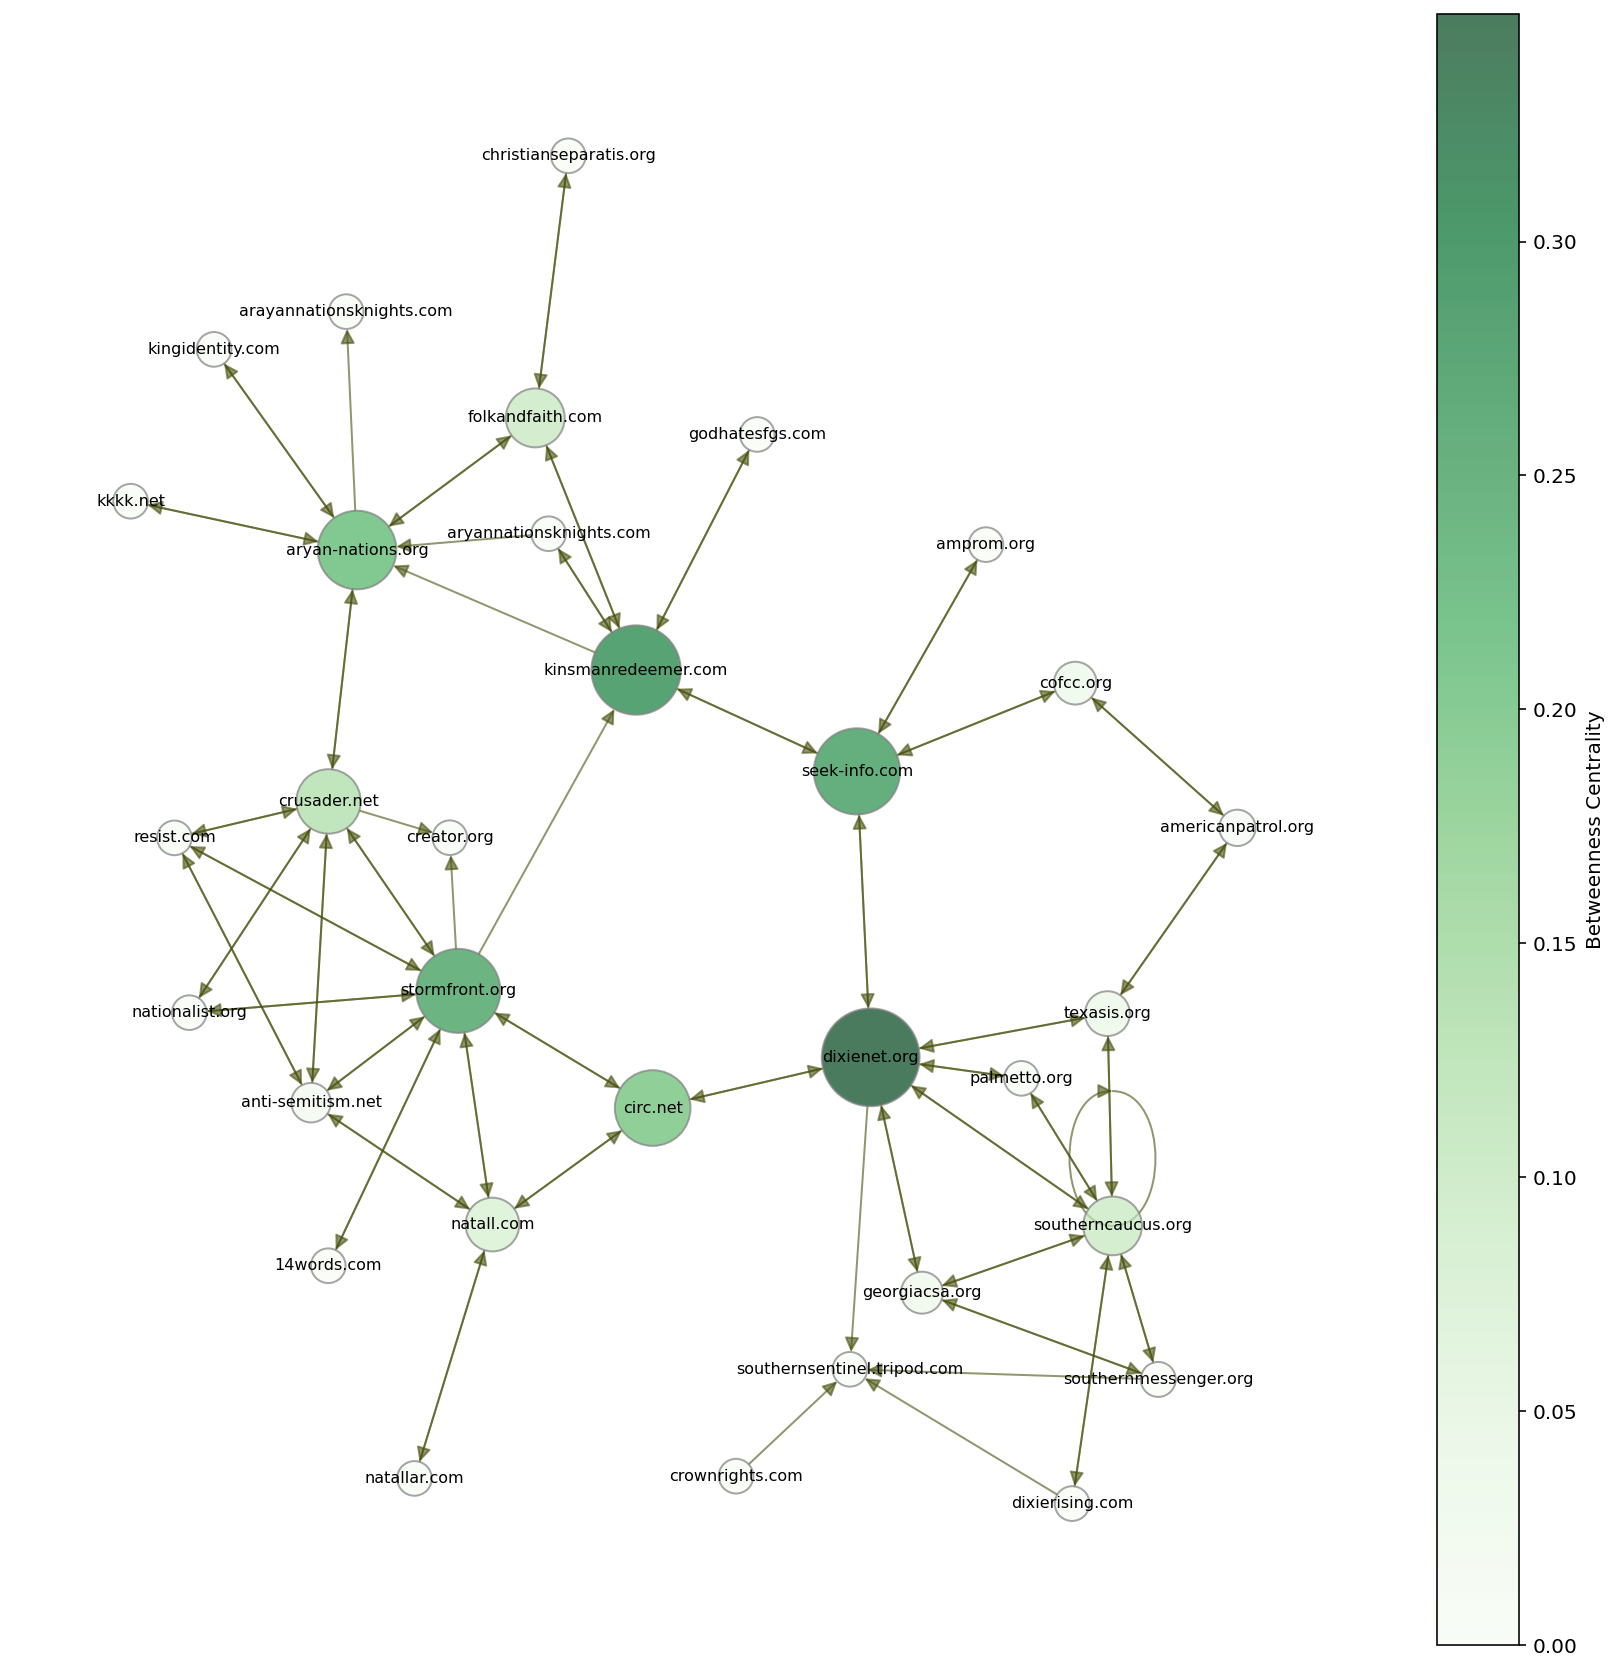

In [41]:
# Betweenness Centrality Graph

# calculate the size of each node based on betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_directed)
node_size = [v * 6000 + 300 for v in betweenness_centrality.values()]

# Color map based on Betweenness centrality
colors = [betweenness_centrality.get(node, 0) for node in G_directed.nodes()]

# draw graph
plt.figure(figsize=(15, 15))
nodes = nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color=colors, cmap=plt.cm.Greens, alpha=0.7)
nodes.set_edgecolor("grey")
edges = nx.draw_networkx_edges(G_directed, pos,node_size=node_size, arrows = True, edge_color=(0.28235,0.317647, 0.05490), arrowsize=15, alpha=0.6)

nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')

# add legend
plt.colorbar(nodes, label='Betweenness Centrality')

plt.axis('off')
plt.show()

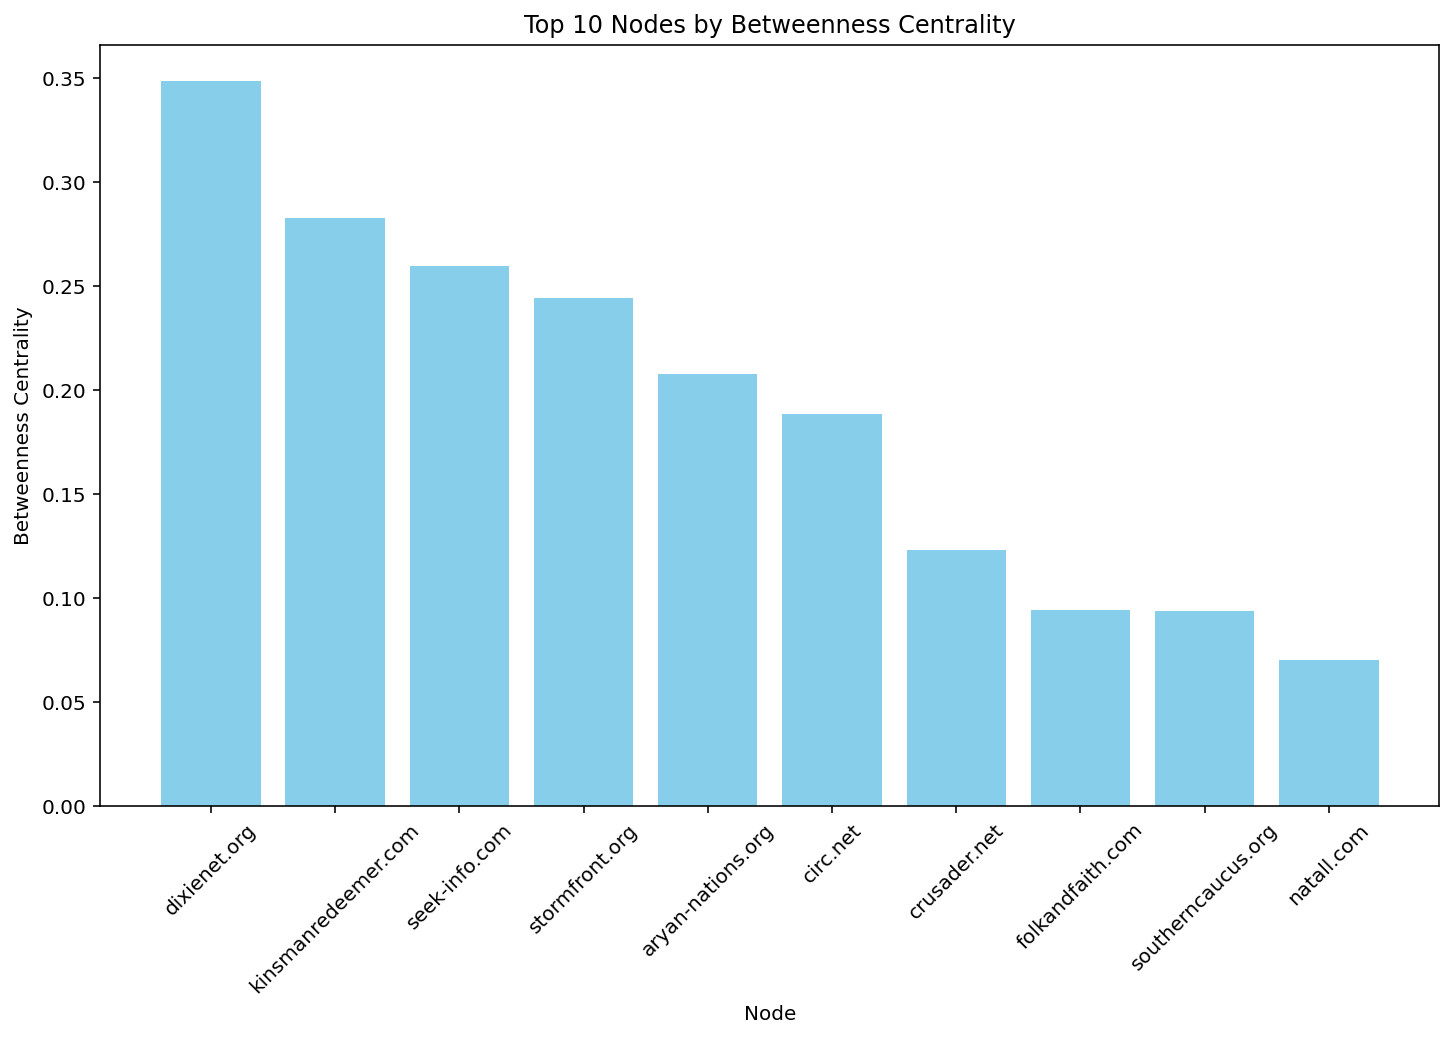

In [42]:
n = 10  # number of node

# calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_directed)
top_n_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

# Extracting node names and centrality values into separate lists
nodes = [node for node, centrality in top_n_betweenness_nodes]
centralities = [centrality for node, centrality in top_n_betweenness_nodes]

# Creation of the histogram
plt.figure(figsize=(12, 7))  
plt.bar(nodes, centralities, color='skyblue')  
plt.title('Top 10 Nodes by Betweenness Centrality')
plt.xlabel('Node')
plt.ylabel('Betweenness Centrality')

plt.xticks(rotation=45)  
plt.show()


#### Local and Global Clustering



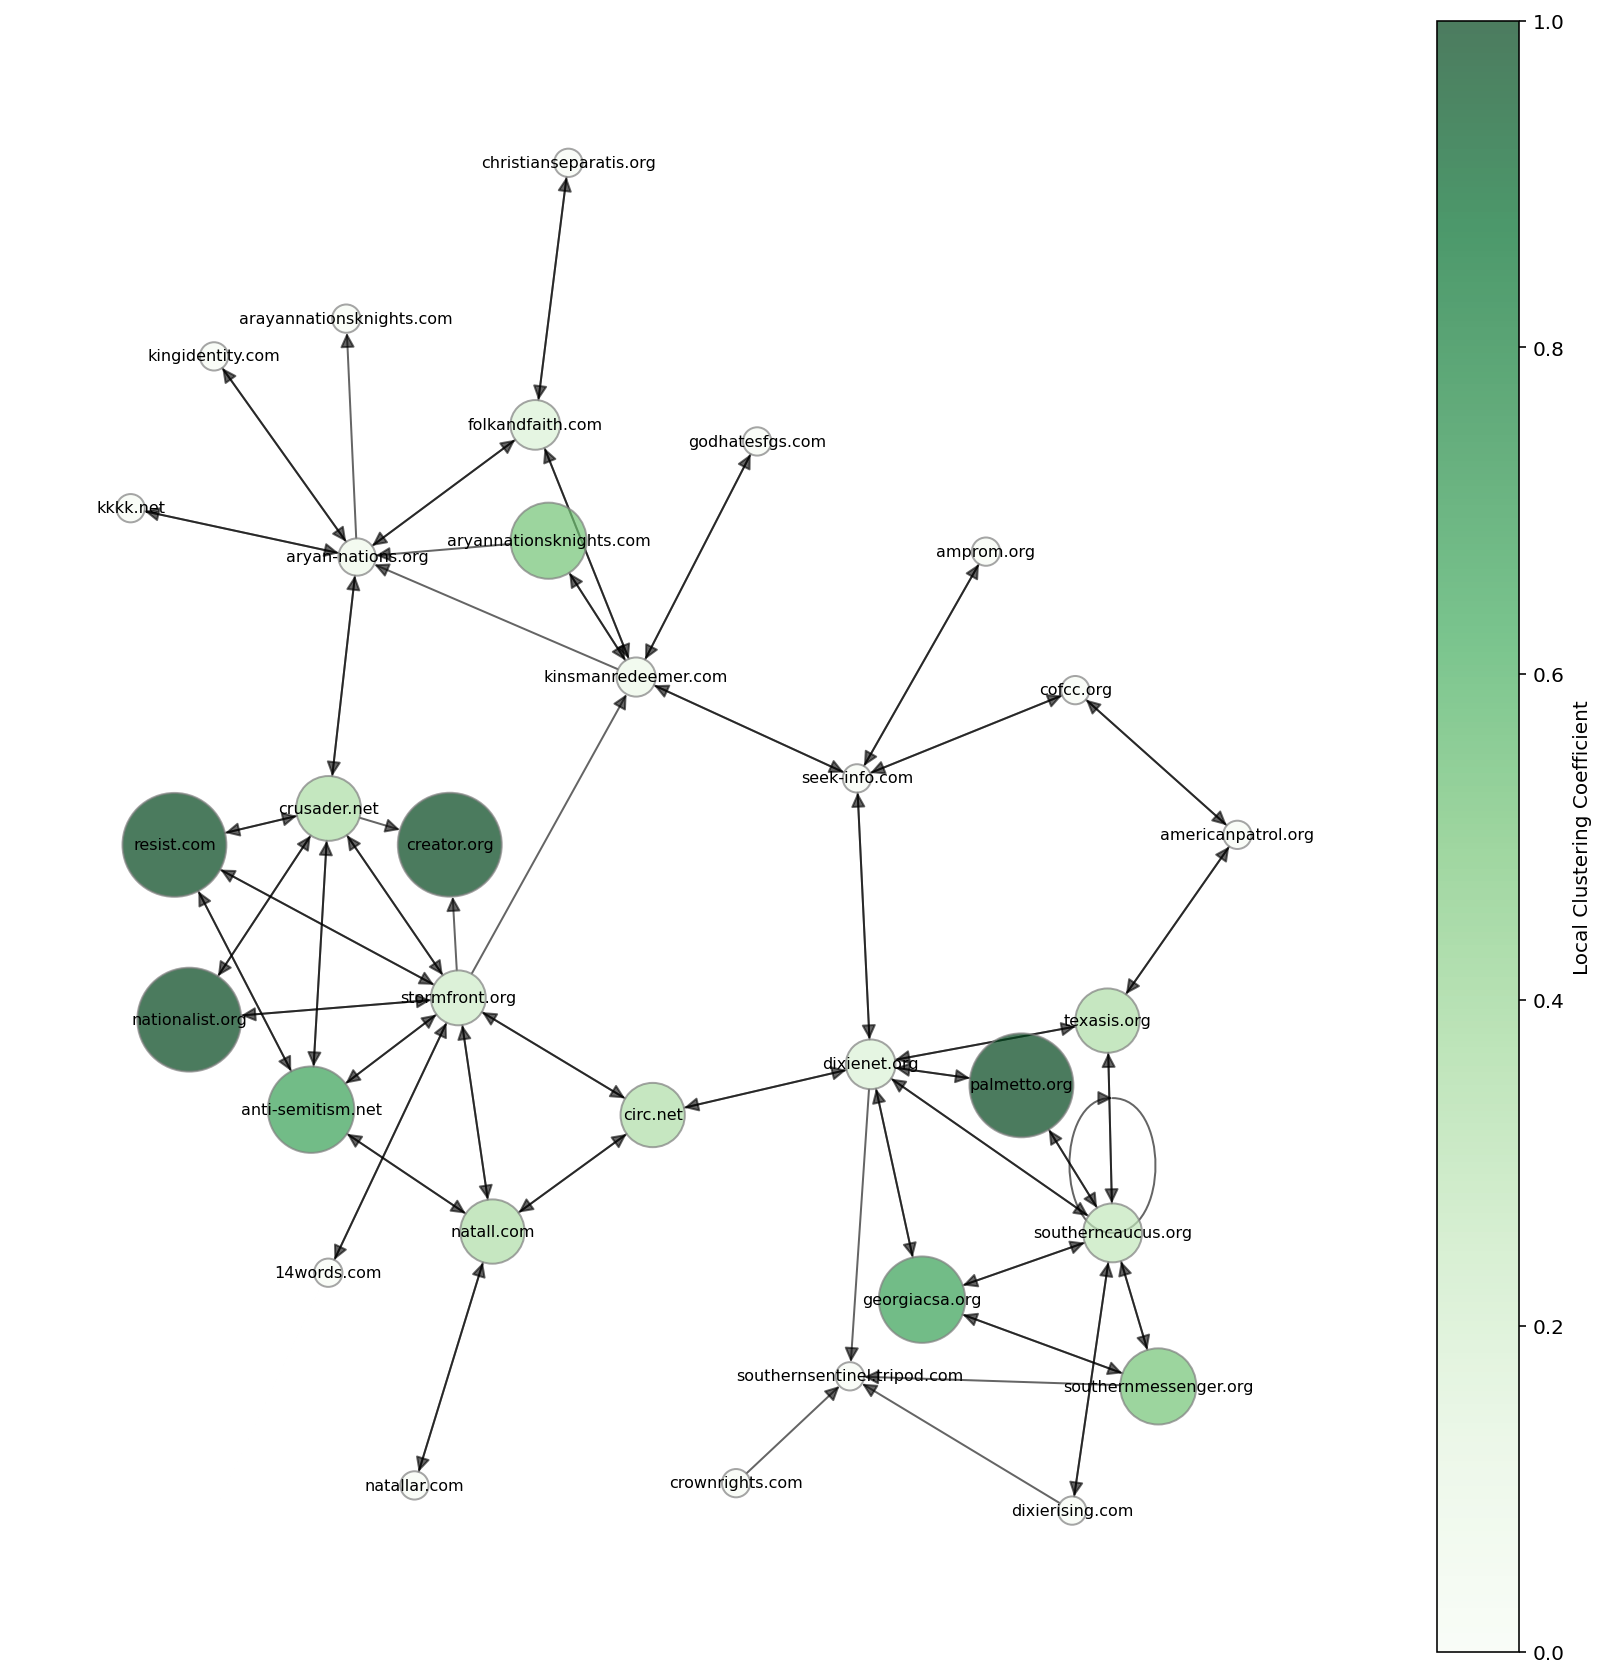

In [11]:
# Calculate the local clustering coefficient for each node
clustering_centrality = nx.clustering(G_directed)
node_size = [v * 2500 + 200 for v in clustering_centrality.values()]

# Color map based on clustering coefficient
colors = [clustering_centrality.get(node, 0) for node in G_directed.nodes()]

# Draw graph
plt.figure(figsize=(15, 15))
nodes = nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color=colors, cmap=plt.cm.Greens, alpha=0.7)
nodes.set_edgecolor("grey")
edges = nx.draw_networkx_edges(G_directed, pos, node_size=node_size, arrows=True, edge_color="black", arrowsize=15, alpha=0.6)

nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')

# Add legend
plt.colorbar(nodes, label='Local Clustering Coefficient')

plt.axis('off')
plt.show()


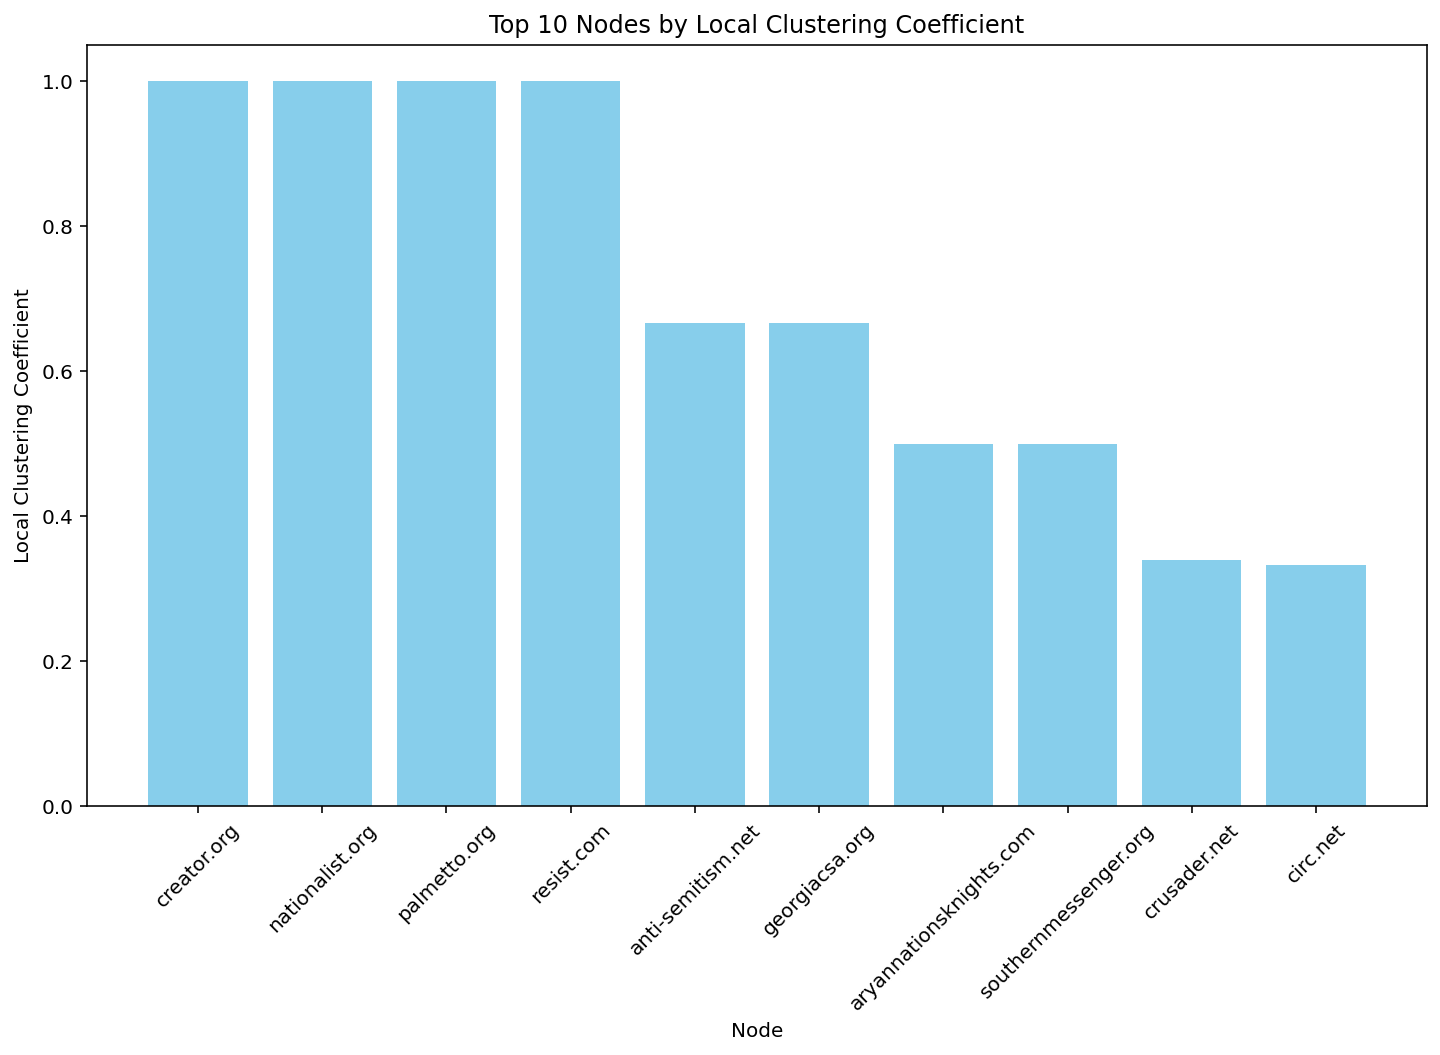

In [12]:
n = 10  # Number of nodes

# Calculate local clustering coefficients
clustering_centrality = nx.clustering(G_directed)
top_n_clustering_nodes = sorted(clustering_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

# Extracting node names and centrality values into separate lists
nodes = [node for node, centrality in top_n_clustering_nodes]
centralities = [centrality for node, centrality in top_n_clustering_nodes]

# Creation of the histogram
plt.figure(figsize=(12, 7))
plt.bar(nodes, centralities, color='skyblue')
plt.title('Top 10 Nodes by Local Clustering Coefficient')
plt.xlabel('Node')
plt.ylabel('Local Clustering Coefficient')

plt.xticks(rotation=45)
plt.show()


In [14]:
# Calculate the average clustering coefficient for the directed graph
average_clustering = nx.average_clustering(G_directed)

print("Global Clustering Coefficient:", average_clustering)

Global Clustering Coefficient: 0.26958020414079725


#### Reciprocity



In [7]:
reciprocity = nx.reciprocity(G_directed)
print("Reciprocity of the Graph:", reciprocity)

Reciprocity of the Graph: 0.8764044943820225


#### Homophily



In [11]:
# Calcolo dell'assortatività per out-degree
out_degree_assortativity = nx.degree_assortativity_coefficient(G_directed, x='out', y='out')
print("Assortatività per Out-Degree:", out_degree_assortativity)

# Calcolo dell'assortatività per in-degree
in_degree_assortativity = nx.degree_assortativity_coefficient(G_directed, x='in', y='in')
print("Assortatività per In-Degree:", in_degree_assortativity)


# Per out-degree
omophily_out_degree = nx.degree_assortativity_coefficient(G_directed, x='out', y='out')
print("Omofilia basata su Out-Degree:", omophily_out_degree)

# Per in-degree
omophily_in_degree = nx.degree_assortativity_coefficient(G_directed, x='in', y='in')
print("Omofilia basata su In-Degree:", omophily_in_degree)

Assortatività per Out-Degree: -0.24520065158635232
Assortatività per In-Degree: -0.35620322072310956
Omofilia basata su Out-Degree: -0.24520065158635232
Omofilia basata su In-Degree: -0.35620322072310956


#### Triad Census (16 possibili configurazioni)
<ul>
  <li>003 = Triangolo </li>
  <li>012 = Triangolo aperto</li>
  <li>102 = Percorso </li>
  <li>021D, 021U, 021C = Triangolo con direzione </li>
  <li> 111D, 111U = Catena </li>
  <li> 030T = Triangolo simmetrico</li>
  <li> 030C = Triangolo simmetrico con direzione</li>
  <li> 201= Stella </li>
  <li> 120D, 120U, 120C = Forchetta</li>
  <li> 210 = Catena simmetrica </li>
  <li> 300 = Nodo vuoto</li>
</ul> 

In [36]:
import networkx as nx

triadic_census = nx.triadic_census(G_directed)

print("Triads  | Values:")
for key, value in triadic_census.items():

    print(f"{key}:\t| {value}")

Triads  | Values:
003:	| 3648
012:	| 232
102:	| 936
021D:	| 1
021U:	| 6
021C:	| 3
111D:	| 11
111U:	| 32
030T:	| 0
030C:	| 0
201:	| 77
120D:	| 0
120U:	| 2
120C:	| 0
210:	| 1
300:	| 11


#### Clique su nodi con archi bidirezionali



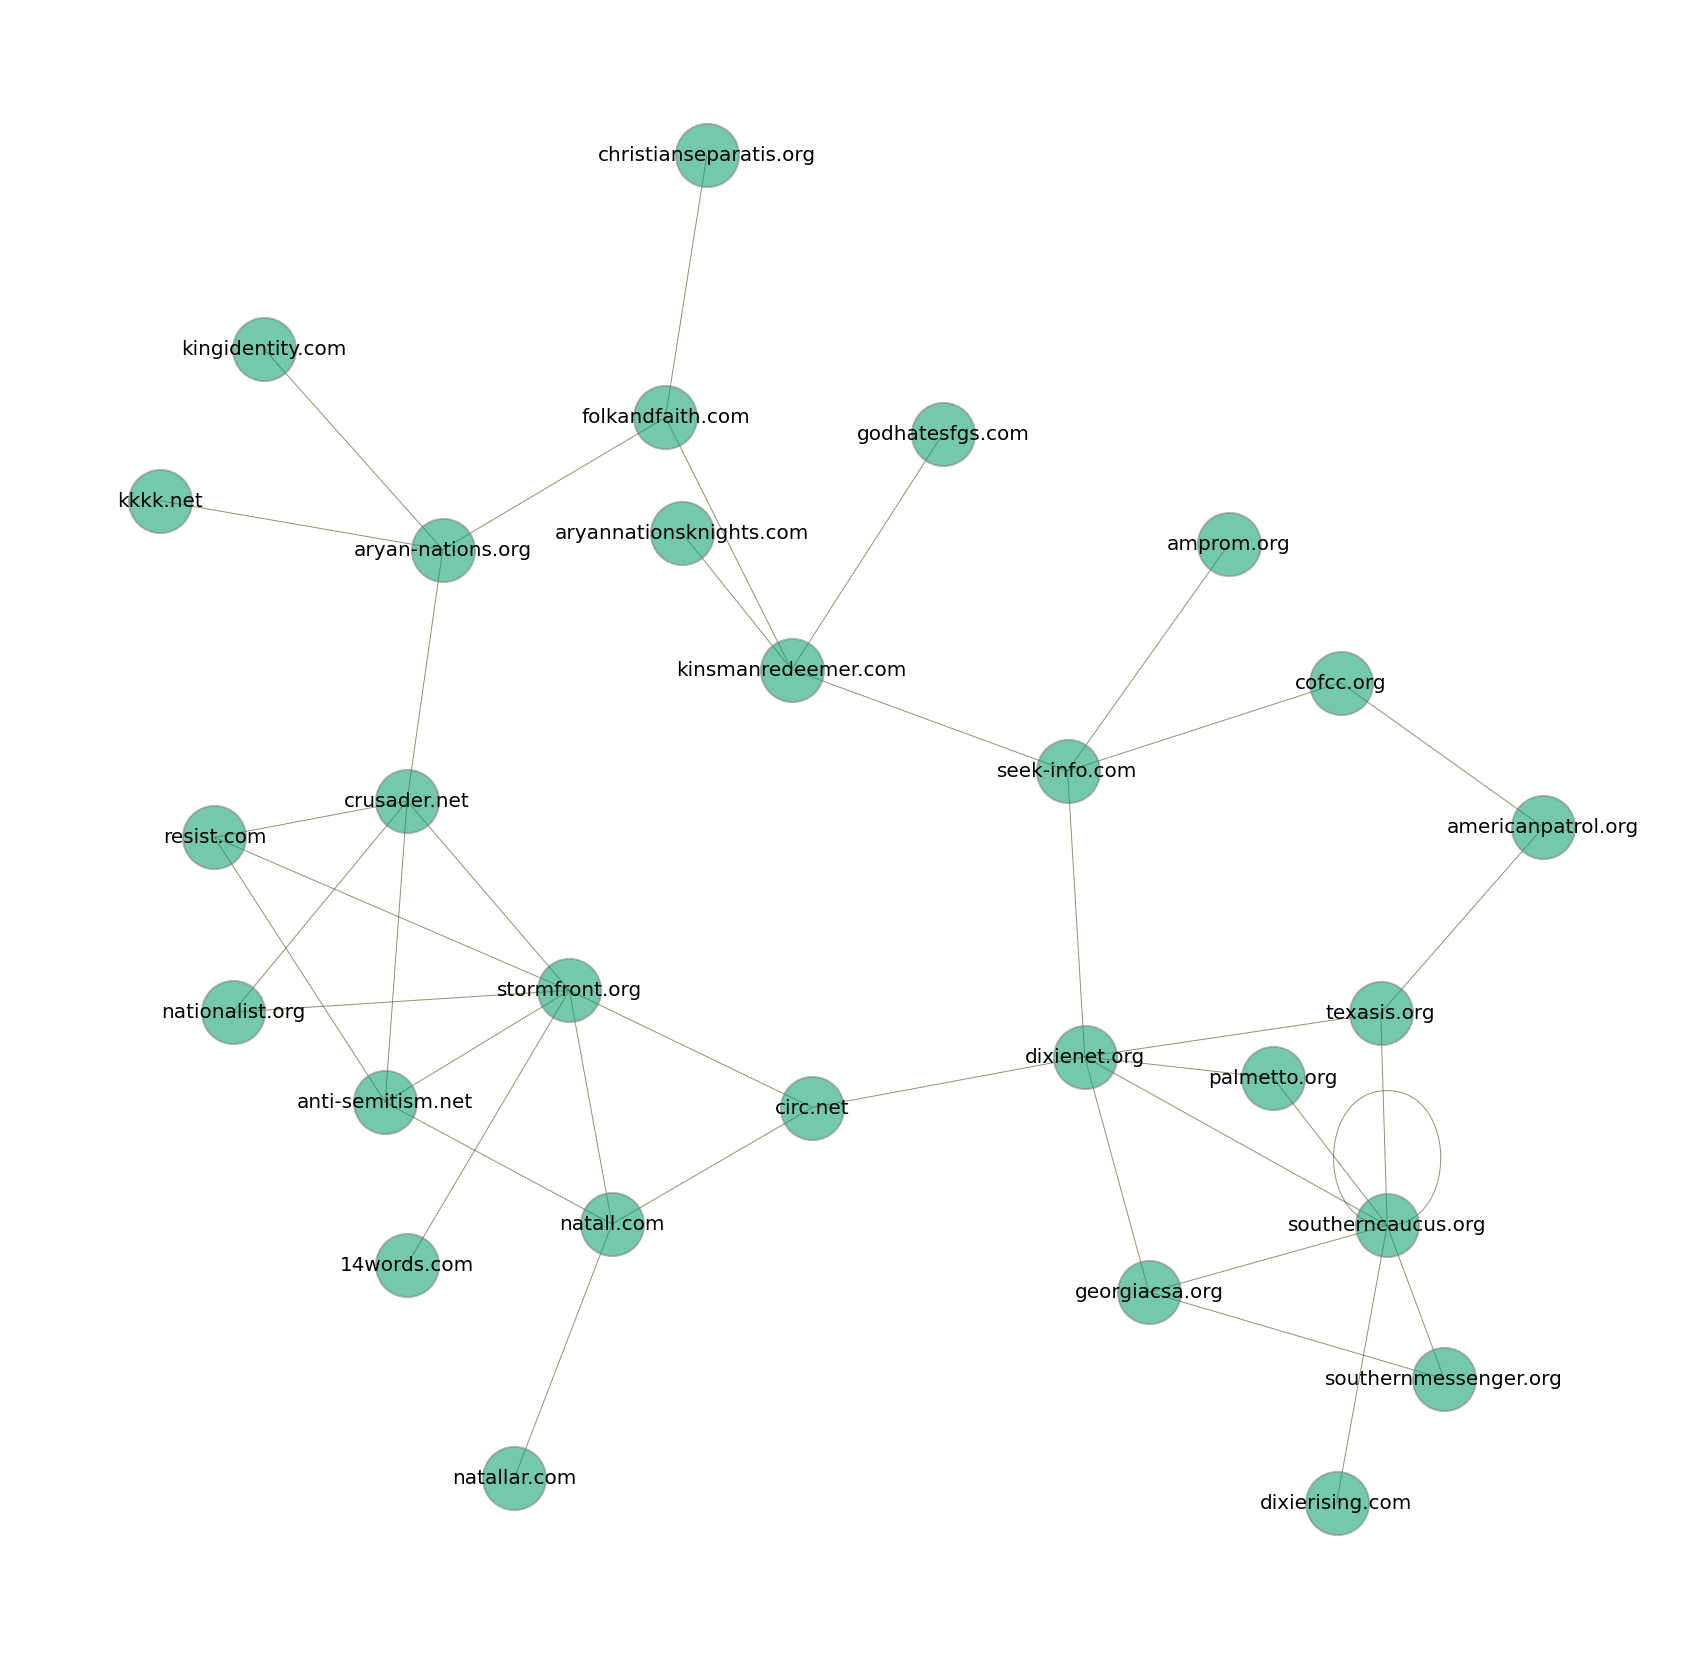

In [16]:
# we build a new graph with edges that are present only when there is a bidirectional connection between the two nodes
reciprocal_edges = [(u, v) for u, v in G_directed.edges() if G_directed.has_edge(v, u)]
G_reciprocal = nx.DiGraph()
G_reciprocal.add_edges_from(reciprocal_edges)


# convert the Graph in an undirected Graph (if we have bidirectional connections we can generalize to it)
G_undirected = G_reciprocal.to_undirected()


node_size = 1000
plt.figure(figsize=(15, 15))
nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_size, node_color='#029e6b', alpha=0.55)
nodes.set_edgecolor("grey")
nx.draw_networkx_edges(G_undirected, pos, width=edge_width,node_size=node_size,alpha=0.6, arrows=False, edge_color=(0.28235,0.317647, 0.05490) )
nx.draw_networkx_labels(G_undirected, pos, font_size=10, font_color='black')
plt.axis('off') 
plt.show()